In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("..")
import AnalyzeSymAsym as asa

/home/mwagner/bin/anaconda3/envs/hcprediction/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BASE = Path("../SymAsymRNN") / "N100T100" / "lambda0p50"

# Pick the conditions you want to compare
conditions = {
    "baseline • none • asym1": pd.read_csv(
        BASE / "baseline/none/asym1/analysis/timeseries_metrics.csv"
    ),
    "centcycmh • frobenius • asym1": pd.read_csv(
        BASE / "centcycmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    # "centcyctridiag • frobenius • asym1": pd.read_csv(
    #    BASE / "centcyctridiag/frobenius/asym1/analysis/timeseries_metrics.csv"
    # ),
    "centmh • frobenius • asym1": pd.read_csv(
        BASE / "centmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    "cycshift • frobenius • asym1": pd.read_csv(
        BASE / "cycshift/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    "learned • frobenius • asym1": pd.read_csv(
        BASE / "learned/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    # "identity • frobenius • asym1": pd.read_csv(
    #    BASE / "identity/frobenius/asym1/analysis/timeseries_metrics.csv"
    # ),
    # "shift • frobenius • asym1": pd.read_csv(
    #    BASE / "shift/frobenius/asym1/analysis/timeseries_metrics.csv"
    # ),
    # "shiftcycmh • frobenius • asym1": pd.read_csv(
    #    BASE / "shiftcycmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    # ),
    # "shiftcyctridiag • frobenius • asym1": pd.read_csv(
    #    BASE / "shiftcyctridiag/frobenius/asym1/analysis/timeseries_metrics.csv"
    # ),
    # "shiftmh • frobenius • asym1": pd.read_csv(
    #    BASE / "shiftmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    # ),
}

condition_roots = {
    "baseline • none • asym1": BASE / "baseline/none/asym1/multiruns",
    "centcycmh • frobenius • asym1": BASE / "centcycmh/frobenius/asym1/multiruns",
    # "centcyctridiag • frobenius • asym1": BASE
    # / "centcyctridiag/frobenius/asym1/multiruns",
    "centmh • frobenius • asym1": BASE / "centmh/frobenius/asym1/multiruns",
    "cycshift • frobenius • asym1": BASE / "cycshift/frobenius/asym1/multiruns",
    # "identity • frobenius • asym1": BASE / "identity/frobenius/asym1/multiruns",
    # "shift • frobenius • asym1": BASE / "shift/frobenius/asym1/multiruns",
    # "shiftcycmh • frobenius • asym1": BASE / "shiftcycmh/frobenius/asym1/#multiruns",
    # "shiftcyctridiag • frobenius • asym1": BASE
    # / "shiftcyctridiag/frobenius/asym1/multiruns",
    # "shiftmh • frobenius • asym1": BASE / "shiftmh/frobenius/asym1/multiruns",
    "learned • frobenius • asym1": BASE / "learned/frobenius/asym1/multiruns",
}

condition  init_epoch  init_loss     slope  intercept  \
0        baseline • none • asym1           0   0.177244 -0.000098  -1.983578   
1  centcycmh • frobenius • asym1           0   0.181841 -0.000095  -2.414048   
2     centmh • frobenius • asym1           0   0.181021 -0.000090  -2.428907   
3   cycshift • frobenius • asym1           0   0.178267 -0.000090  -2.184055   
4    learned • frobenius • asym1           0   0.186004 -0.000045  -2.613540   

         r2  half_life_epochs  fit_emin  fit_emax  
0  0.955870       7085.771163         0     29000  
1  0.904574       7272.518848         0     29000  
2  0.911396       7679.816185         0     29000  
3  0.923659       7730.164943         0     29000  
4  0.736446      15338.999879         0     29000

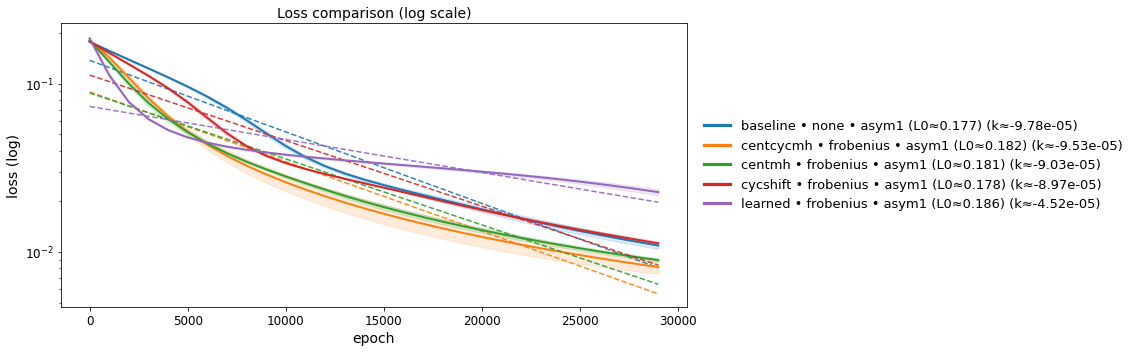

In [3]:
# Now overlay them
fit_stats = asa.overlay_loss(
    conditions,
    title="Loss comparison",
    fontsize=14,
    figsize=(20, 5),
    fit=True,
    fit_range=None,
    plot_fit=True,
    logy=True,
)
display(fit_stats)

../AnalyzeSymAsym.py:551: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(rect=(0.0, 0.0, 0.8, 1.0))


condition  init_epoch  init_loss  slope  intercept  r2  \
0        baseline • none • asym1           0   0.177244    NaN        NaN NaN   
1  centcycmh • frobenius • asym1           0   0.181841    NaN        NaN NaN   
2     centmh • frobenius • asym1           0   0.181021    NaN        NaN NaN   
3   cycshift • frobenius • asym1           0   0.178267    NaN        NaN NaN   
4    learned • frobenius • asym1           0   0.186004    NaN        NaN NaN   

   half_life_epochs  fit_emin  fit_emax  
0               NaN         0     29000  
1               NaN         0     29000  
2               NaN         0     29000  
3               NaN         0     29000  
4               NaN         0     29000

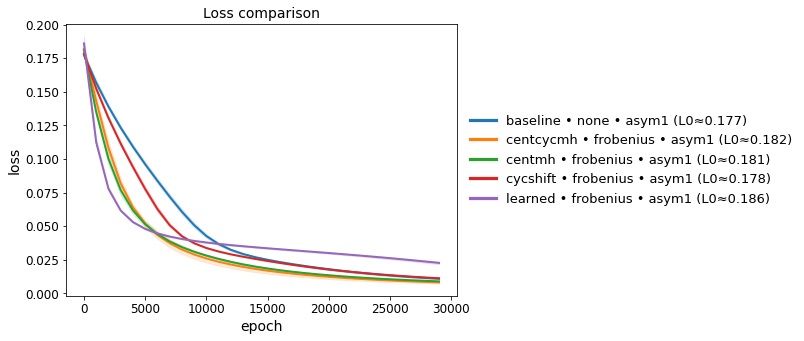

In [4]:
asa.overlay_loss(
    conditions,
    title="Loss comparison",
    fontsize=14,
    figsize=(7, 5),
    fit=False,
    fit_range=None,
    plot_fit=False,
    logy=False,
)

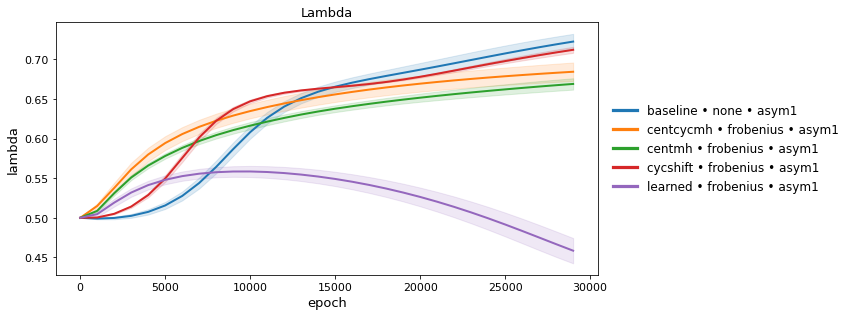

In [5]:
fit_spec = asa.overlay_metric(
    conditions,
    key="lambda",
    title="Lambda",
    fontsize=13,
    figsize=(15, 4.5),
    logy=False,
    fit=False,
    fit_on_log=False,  # ln(metric) fit
    fit_range=None,
    plot_fit=False,
)

In [6]:
fit_spec = asa.overlay_metric(
    conditions,
    key="drift_from_init",
    title="Drift from Init",
    fontsize=13,
    figsize=(15, 4.5),
    logy=False,
    fit=False,
    fit_on_log=False,  # ln(metric) fit
    fit_range=None,
    plot_fit=False,
)

../AnalyzeSymAsym.py:718: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(rect=(0.0, 0.0, 0.8, 1.0))


condition  slope  intercept  r2  half_life_epochs  \
0        baseline • none • asym1    NaN        NaN NaN               NaN   
1  centcycmh • frobenius • asym1    NaN        NaN NaN               NaN   
2     centmh • frobenius • asym1    NaN        NaN NaN               NaN   
3   cycshift • frobenius • asym1    NaN        NaN NaN               NaN   
4    learned • frobenius • asym1    NaN        NaN NaN               NaN   

   fit_emin  fit_emax  
0         0     29000  
1         0     29000  
2         0     29000  
3         0     29000  
4         0     29000

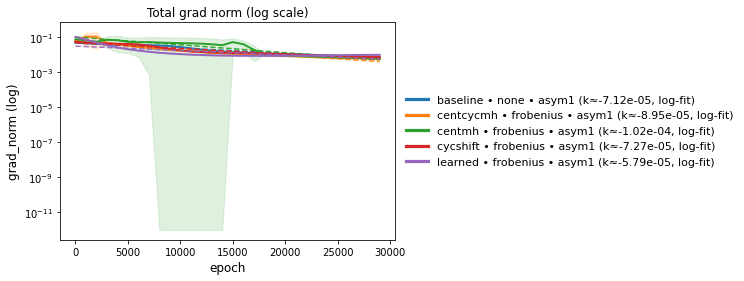

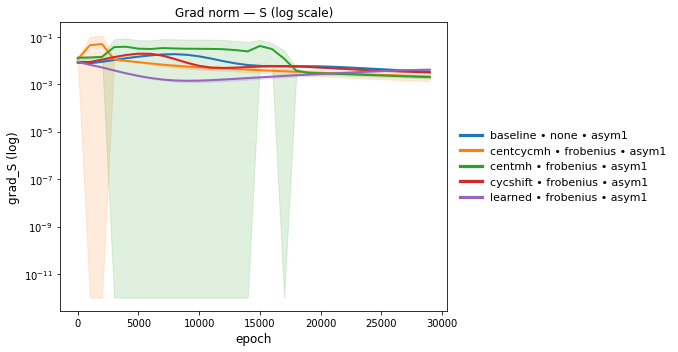

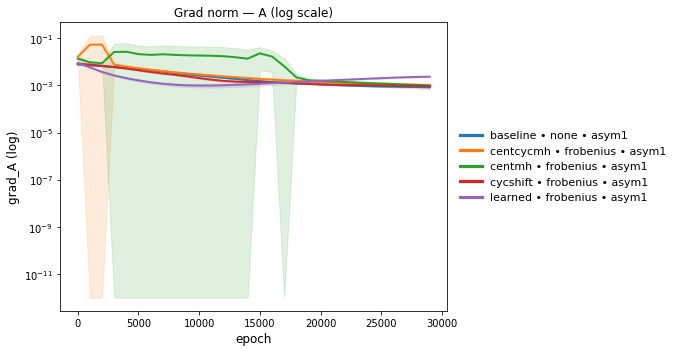

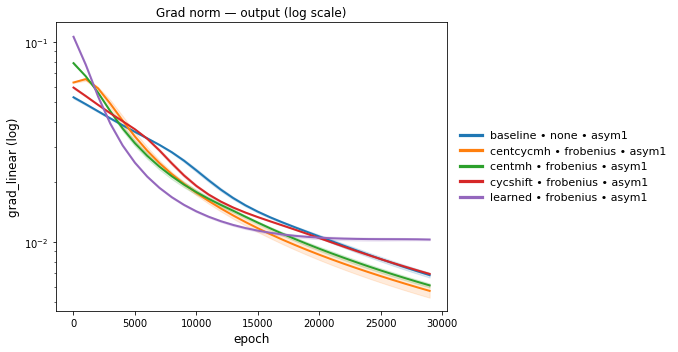

In [7]:
# total grad norm
asa.overlay_metric(
    conditions, key="grad_norm", title="Total grad norm", logy=True, fit=True
)

# per-group grad norms
asa.overlay_metric(
    conditions, key="grad_S", title="Grad norm — S", logy=True, figsize=(12, 5)
)
asa.overlay_metric(
    conditions, key="grad_A", title="Grad norm — A", logy=True, figsize=(12, 5)
)
asa.overlay_metric(
    conditions,
    key="grad_linear",
    title="Grad norm — output",
    logy=True,
    figsize=(12, 5),
)

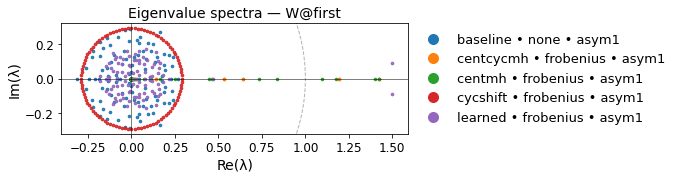

In [8]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_eigs_snapshots(
    condition_roots,
    snapshot="first",  # or "first" / "middle"
    matrix="W",  # choose "W", "S", or "A"
    title="Eigenvalue spectra",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
)

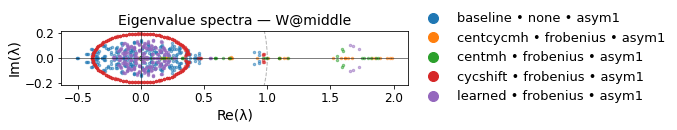

In [9]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_eigs_snapshots(
    condition_roots,
    snapshot="middle",  # or "first" / "middle"
    matrix="W",  # choose "W", "S", or "A"
    title="Eigenvalue spectra",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
)

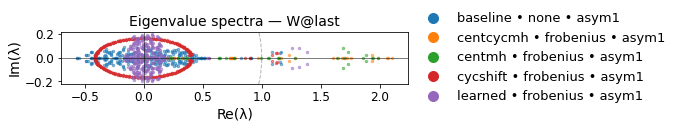

In [10]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_eigs_snapshots(
    condition_roots,
    snapshot="last",  # or "first" / "middle"
    matrix="W",  # choose "W", "S", or "A"
    title="Eigenvalue spectra",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
)

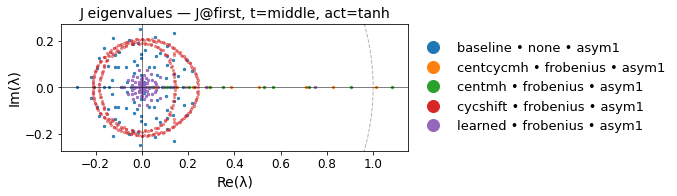

In [11]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_jacobian_eigs_snapshots(
    condition_roots,
    snapshot="first",  # first|middle|last epoch
    tstep="middle",  # first|middle|last time-step
    act="tanh",  # match your RNN hidden nonlinearity
    title="J eigenvalues",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
    unit_circle=True,
    s=5.0,
    alpha=0.45,
    legend_marker_size=12,
)

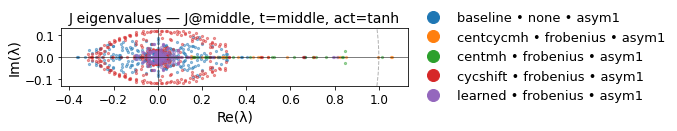

In [12]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_jacobian_eigs_snapshots(
    condition_roots,
    snapshot="middle",  # first|middle|last epoch
    tstep="middle",  # first|middle|last time-step
    act="tanh",  # match your RNN hidden nonlinearity
    title="J eigenvalues",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
    unit_circle=True,
    s=5.0,
    alpha=0.45,
    legend_marker_size=12,
)

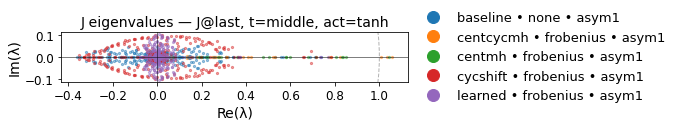

In [13]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_jacobian_eigs_snapshots(
    condition_roots,
    snapshot="last",  # first|middle|last epoch
    tstep="middle",  # first|middle|last time-step
    act="tanh",  # match your RNN hidden nonlinearity
    title="J eigenvalues",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
    unit_circle=True,
    s=5.0,
    alpha=0.45,
    legend_marker_size=12,
)

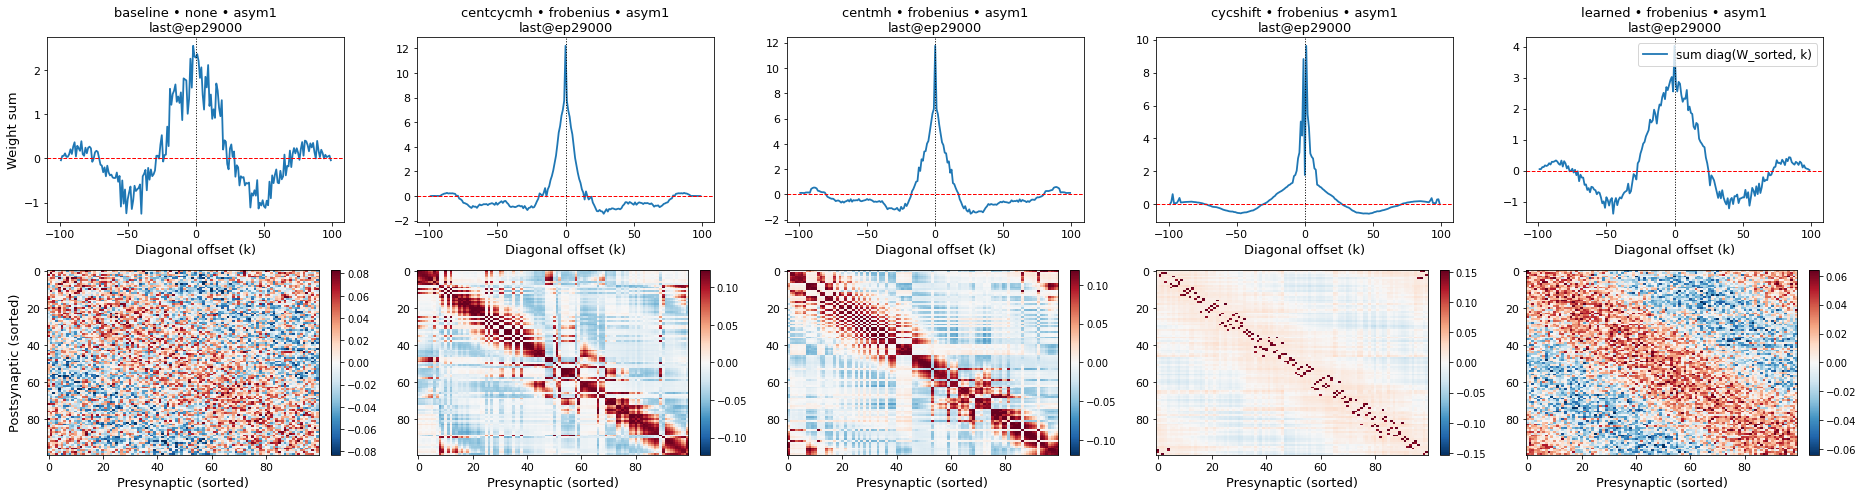

In [14]:
asa.overlay_weight_traces(
    condition_roots,
    snapshot="last",  # or "first" / "middle"
    use_rolling=False,  # True to smooth hidden before argmax
    rolling_window=5,
    fontsize=13,
    figsize_per_cond=(5.2, 3.5),  # width × height per column
    show_heatmap=True,
)

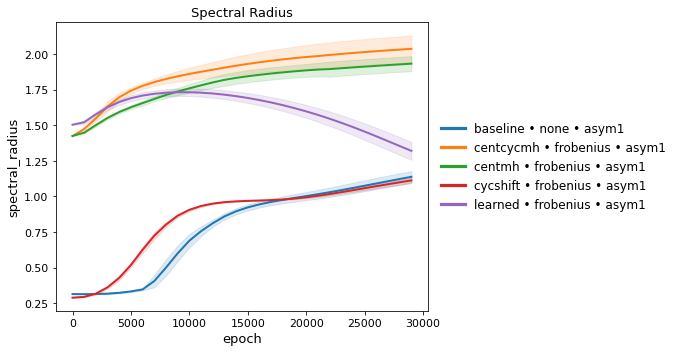

In [15]:
fit_spec = asa.overlay_metric(
    conditions,
    key="spectral_radius",
    title="Spectral Radius",
    fontsize=13,
    figsize=(12, 5),
    logy=False,
    fit=False,
    fit_on_log=False,  # ln(metric) fit
    fit_range=None,
    plot_fit=False,
)

condition  slope  intercept  r2  half_life_epochs  \
0        baseline • none • asym1    NaN        NaN NaN               NaN   
1  centcycmh • frobenius • asym1    NaN        NaN NaN               NaN   
2     centmh • frobenius • asym1    NaN        NaN NaN               NaN   
3   cycshift • frobenius • asym1    NaN        NaN NaN               NaN   
4    learned • frobenius • asym1    NaN        NaN NaN               NaN   

   fit_emin  fit_emax  
0         0     29000  
1         0     29000  
2         0     29000  
3         0     29000  
4         0     29000

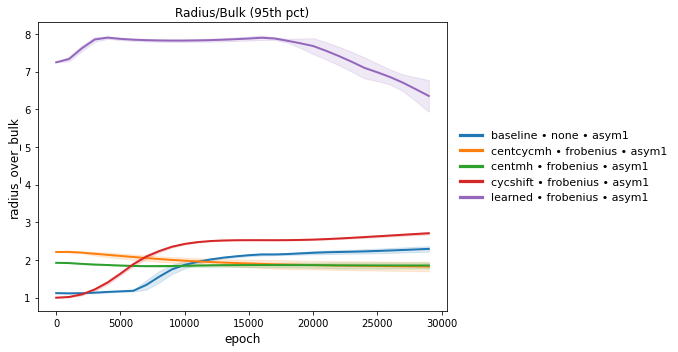

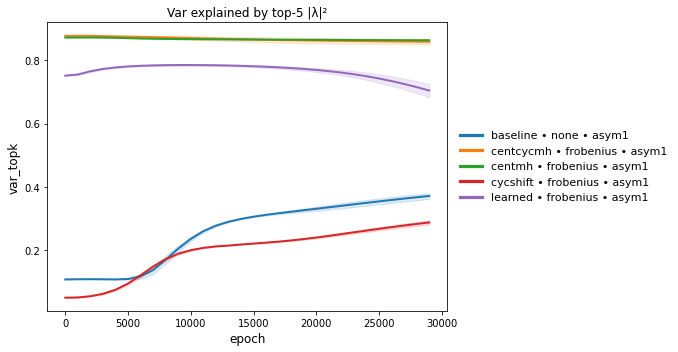

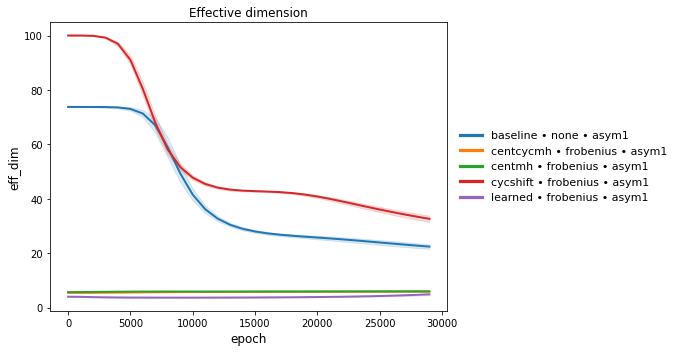

In [16]:
asa.overlay_metric(
    conditions, key="radius_over_bulk", title="Radius/Bulk (95th pct)", figsize=(12, 5)
)
asa.overlay_metric(
    conditions, key="var_topk", title="Var explained by top-5 |λ|²", figsize=(12, 5)
)
asa.overlay_metric(
    conditions, key="eff_dim", title="Effective dimension", figsize=(12, 5)
)

# Comparison of different lambda initializations

In [17]:
BASE_0p10 = Path("../SymAsymRNN") / "N100T100" / "lambda0p10"
BASE_0p25 = Path("../SymAsymRNN") / "N100T100" / "lambda0p25"
BASE_0p50 = Path("../SymAsymRNN") / "N100T100" / "lambda0p50"
BASE_0p75 = Path("../SymAsymRNN") / "N100T100" / "lambda0p75"
BASE_0p90 = Path("../SymAsymRNN") / "N100T100" / "lambda0p90"
BASE_0p99 = Path("../SymAsymRNN") / "N100T100" / "lambda0p99"

# Pick the conditions you want to compare
conditions = {
    "centcycmh0p10 • frobenius • asym1": pd.read_csv(
        BASE_0p10 / "centcycmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    "centcycmh0p25 • frobenius • asym1": pd.read_csv(
        BASE_0p25 / "centcycmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    "centcycmh0p50 • frobenius • asym1": pd.read_csv(
        BASE_0p50 / "centcycmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    "centcycmh0p75 • frobenius • asym1": pd.read_csv(
        BASE_0p75 / "centcycmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    "centcycmh0p90 • frobenius • asym1": pd.read_csv(
        BASE_0p90 / "centcycmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    "centcycmh0p99 • frobenius • asym1": pd.read_csv(
        BASE_0p99 / "centcycmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
}

condition_roots = {
    "centcycmh0p10 • none • asym1": BASE_0p10 / "centcycmh/frobenius/asym1/multiruns",
    "centcycmh0p25 • none • asym1": BASE_0p25 / "centcycmh/frobenius/asym1/multiruns",
    "centcycmh0p50 • frobenius • asym1": BASE_0p50
    / "centcycmh/frobenius/asym1/multiruns",
    "centcycmh0p75 • frobenius • asym1": BASE_0p75
    / "centcycmh/frobenius/asym1/multiruns",
    "centcycmh0p90 • frobenius • asym1": BASE_0p90
    / "centcycmh/frobenius/asym1/multiruns",
    "centcycmh0p99 • frobenius • asym1": BASE_0p99
    / "centcycmh/frobenius/asym1/multiruns",
}

condition  init_epoch  init_loss     slope  \
0  centcycmh0p10 • frobenius • asym1           0   0.177266 -0.000088   
1  centcycmh0p25 • frobenius • asym1           0   0.178116 -0.000092   
2  centcycmh0p50 • frobenius • asym1           0   0.181841 -0.000095   
3  centcycmh0p75 • frobenius • asym1           0   0.184072 -0.000095   
4  centcycmh0p90 • frobenius • asym1           0   0.184032 -0.000093   
5  centcycmh0p99 • frobenius • asym1           0   0.184089 -0.000090   

   intercept        r2  half_life_epochs  fit_emin  fit_emax  
0  -1.909509  0.987894       7891.666809         0     29000  
1  -2.131335  0.936757       7517.812458         0     29000  
2  -2.414048  0.904574       7272.518848         0     29000  
3  -2.431095  0.911787       7260.094600         0     29000  
4  -2.392153  0.911412       7439.579250         0     29000  
5  -2.399528  0.906085       7660.192972         0     29000

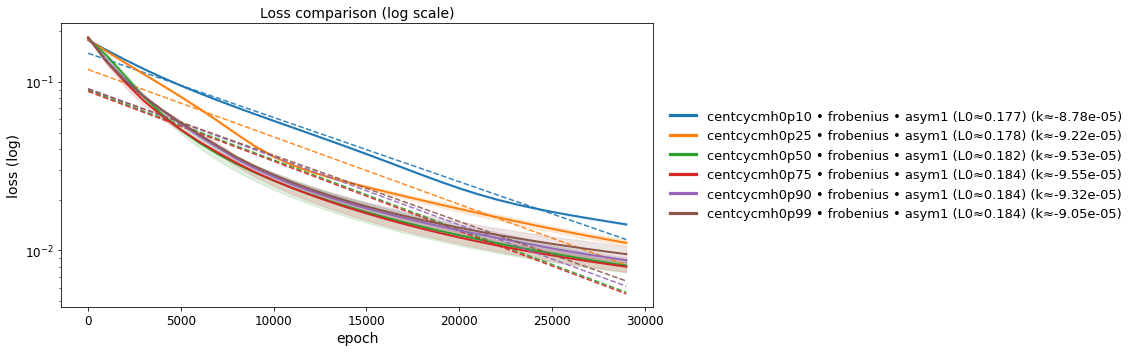

In [18]:
fit_stats = asa.overlay_loss(
    conditions,
    title="Loss comparison",
    fontsize=14,
    figsize=(20, 5),
    fit=True,
    fit_range=None,
    plot_fit=True,
    logy=True,
)
display(fit_stats)

condition  init_epoch  init_loss  slope  intercept  \
0  centcycmh0p10 • frobenius • asym1           0   0.177266    NaN        NaN   
1  centcycmh0p25 • frobenius • asym1           0   0.178116    NaN        NaN   
2  centcycmh0p50 • frobenius • asym1           0   0.181841    NaN        NaN   
3  centcycmh0p75 • frobenius • asym1           0   0.184072    NaN        NaN   
4  centcycmh0p90 • frobenius • asym1           0   0.184032    NaN        NaN   
5  centcycmh0p99 • frobenius • asym1           0   0.184089    NaN        NaN   

   r2  half_life_epochs  fit_emin  fit_emax  
0 NaN               NaN         0     29000  
1 NaN               NaN         0     29000  
2 NaN               NaN         0     29000  
3 NaN               NaN         0     29000  
4 NaN               NaN         0     29000  
5 NaN               NaN         0     29000

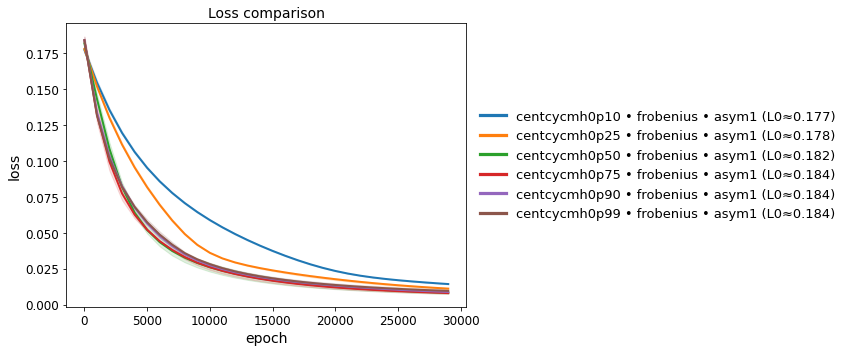

In [19]:
asa.overlay_loss(
    conditions,
    title="Loss comparison",
    fontsize=14,
    figsize=(15, 5),
    fit=False,
    fit_range=None,
    plot_fit=False,
    logy=False,
)

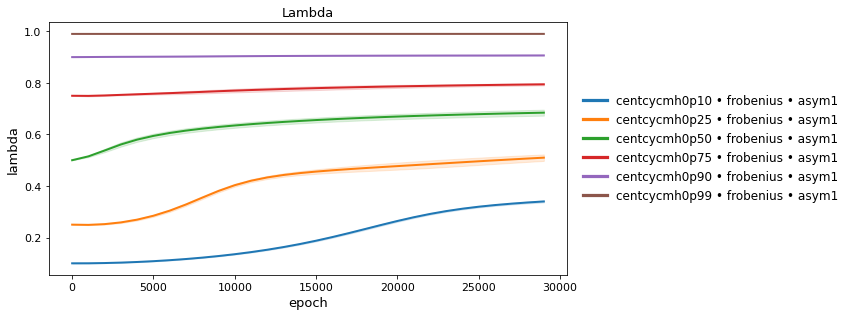

In [20]:
fit_spec = asa.overlay_metric(
    conditions,
    key="lambda",
    title="Lambda",
    fontsize=13,
    figsize=(15, 4.5),
    logy=False,
    fit=False,
    fit_on_log=False,  # ln(metric) fit
    fit_range=None,
    plot_fit=False,
)

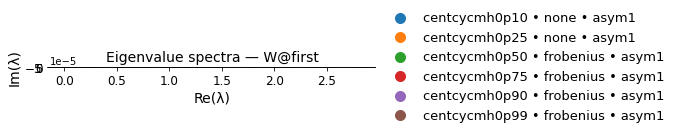

In [21]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_eigs_snapshots(
    condition_roots,
    snapshot="first",  # or "first" / "middle"
    matrix="W",  # choose "W", "S", or "A"
    title="Eigenvalue spectra",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
)

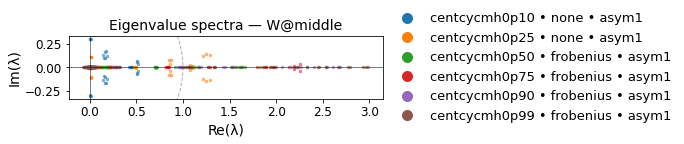

In [22]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_eigs_snapshots(
    condition_roots,
    snapshot="middle",  # or "first" / "middle"
    matrix="W",  # choose "W", "S", or "A"
    title="Eigenvalue spectra",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
)

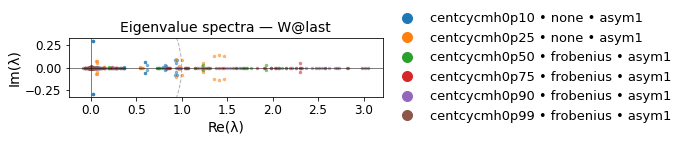

In [23]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_eigs_snapshots(
    condition_roots,
    snapshot="last",  # or "first" / "middle"
    matrix="W",  # choose "W", "S", or "A"
    title="Eigenvalue spectra",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
)

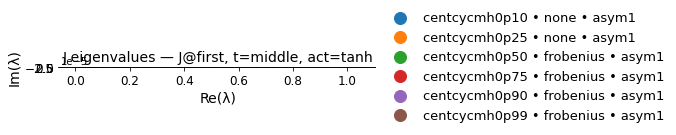

In [24]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_jacobian_eigs_snapshots(
    condition_roots,
    snapshot="first",  # first|middle|last epoch
    tstep="middle",  # first|middle|last time-step
    act="tanh",  # match your RNN hidden nonlinearity
    title="J eigenvalues",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
    unit_circle=True,
    s=5.0,
    alpha=0.45,
    legend_marker_size=12,
)

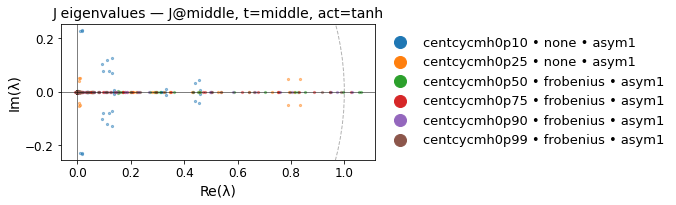

In [25]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_jacobian_eigs_snapshots(
    condition_roots,
    snapshot="middle",  # first|middle|last epoch
    tstep="middle",  # first|middle|last time-step
    act="tanh",  # match your RNN hidden nonlinearity
    title="J eigenvalues",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
    unit_circle=True,
    s=5.0,
    alpha=0.45,
    legend_marker_size=12,
)

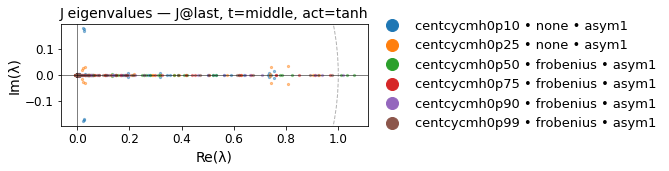

In [26]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_jacobian_eigs_snapshots(
    condition_roots,
    snapshot="last",  # first|middle|last epoch
    tstep="middle",  # first|middle|last time-step
    act="tanh",  # match your RNN hidden nonlinearity
    title="J eigenvalues",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
    unit_circle=True,
    s=5.0,
    alpha=0.45,
    legend_marker_size=12,
)

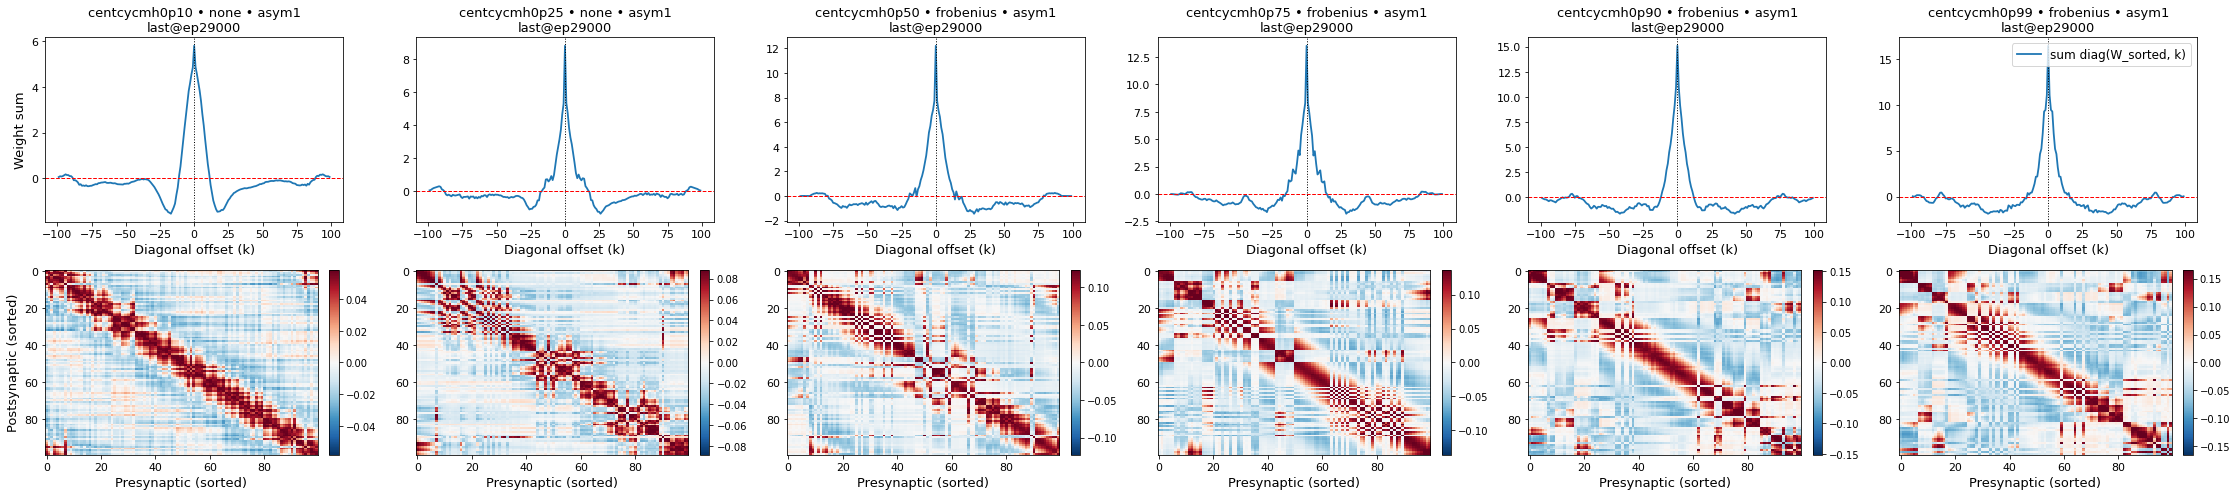

In [27]:
asa.overlay_weight_traces(
    condition_roots,
    snapshot="last",  # or "first" / "middle"
    use_rolling=False,  # True to smooth hidden before argmax
    rolling_window=5,
    fontsize=13,
    figsize_per_cond=(5.2, 3.5),  # width × height per column
    show_heatmap=True,
)

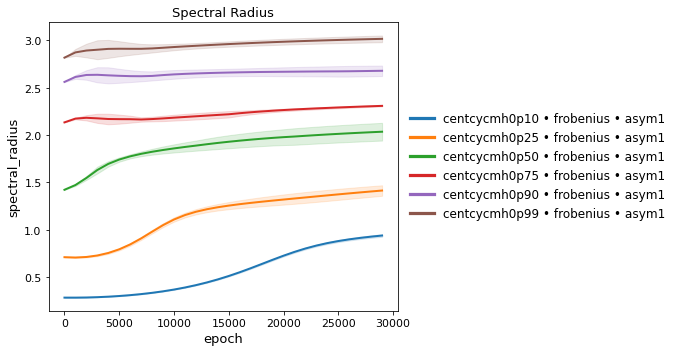

In [28]:
fit_spec = asa.overlay_metric(
    conditions,
    key="spectral_radius",
    title="Spectral Radius",
    fontsize=13,
    figsize=(12, 5),
    logy=False,
    fit=False,
    fit_on_log=False,  # ln(metric) fit
    fit_range=None,
    plot_fit=False,
)

condition  slope  intercept  r2  half_life_epochs  \
0  centcycmh0p10 • frobenius • asym1    NaN        NaN NaN               NaN   
1  centcycmh0p25 • frobenius • asym1    NaN        NaN NaN               NaN   
2  centcycmh0p50 • frobenius • asym1    NaN        NaN NaN               NaN   
3  centcycmh0p75 • frobenius • asym1    NaN        NaN NaN               NaN   
4  centcycmh0p90 • frobenius • asym1    NaN        NaN NaN               NaN   
5  centcycmh0p99 • frobenius • asym1    NaN        NaN NaN               NaN   

   fit_emin  fit_emax  
0         0     29000  
1         0     29000  
2         0     29000  
3         0     29000  
4         0     29000  
5         0     29000

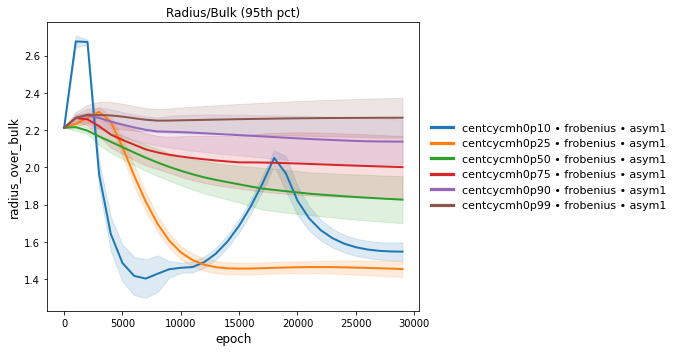

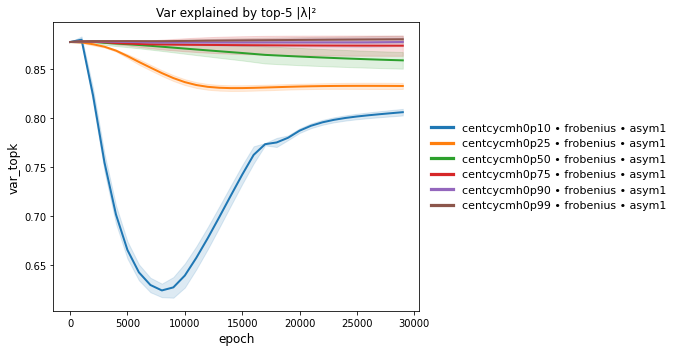

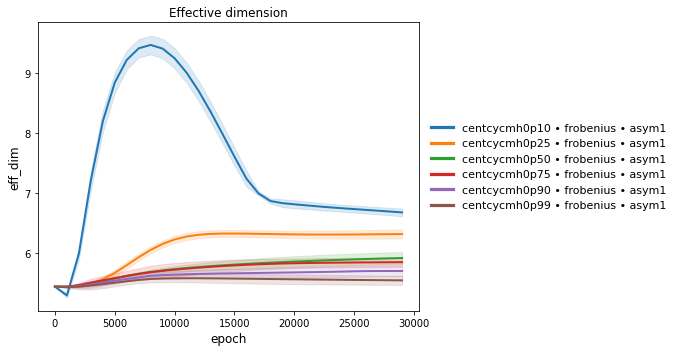

In [29]:
asa.overlay_metric(
    conditions, key="radius_over_bulk", title="Radius/Bulk (95th pct)", figsize=(12, 5)
)
asa.overlay_metric(
    conditions, key="var_topk", title="Var explained by top-5 |λ|²", figsize=(12, 5)
)
asa.overlay_metric(
    conditions, key="eff_dim", title="Effective dimension", figsize=(12, 5)
)

../AnalyzeSymAsym.py:718: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(rect=(0.0, 0.0, 0.8, 1.0))


condition  slope  intercept  r2  half_life_epochs  \
0  centcycmh0p10 • frobenius • asym1    NaN        NaN NaN               NaN   
1  centcycmh0p25 • frobenius • asym1    NaN        NaN NaN               NaN   
2  centcycmh0p50 • frobenius • asym1    NaN        NaN NaN               NaN   
3  centcycmh0p75 • frobenius • asym1    NaN        NaN NaN               NaN   
4  centcycmh0p90 • frobenius • asym1    NaN        NaN NaN               NaN   
5  centcycmh0p99 • frobenius • asym1    NaN        NaN NaN               NaN   

   fit_emin  fit_emax  
0         0     29000  
1         0     29000  
2         0     29000  
3         0     29000  
4         0     29000  
5         0     29000

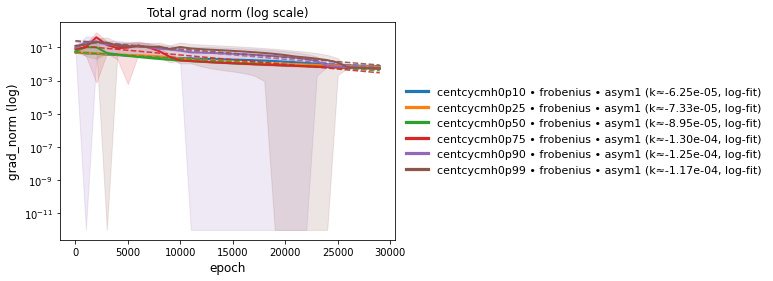

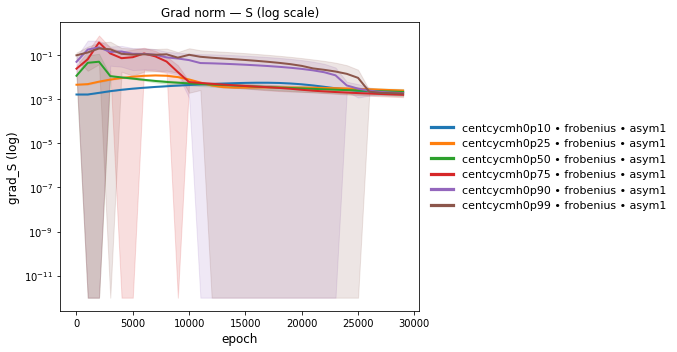

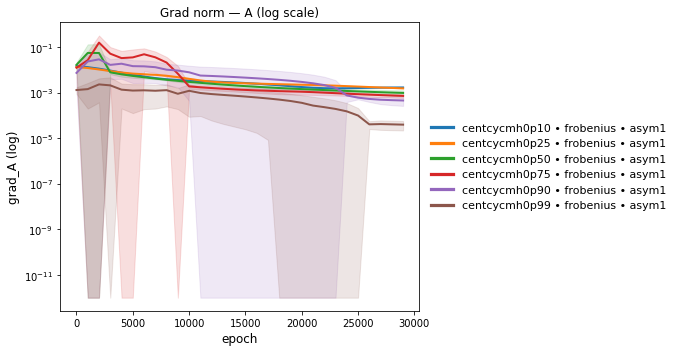

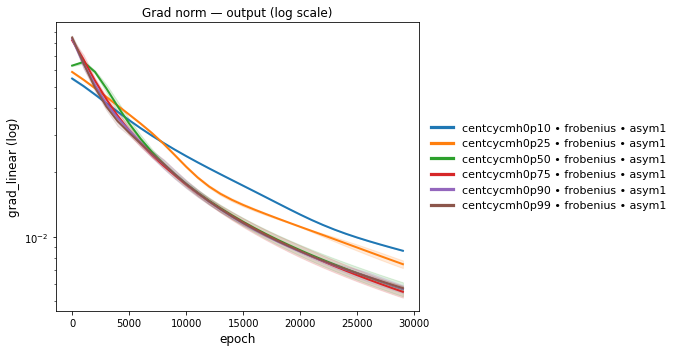

In [30]:
# total grad norm
asa.overlay_metric(
    conditions, key="grad_norm", title="Total grad norm", logy=True, fit=True
)

# per-group grad norms
asa.overlay_metric(
    conditions, key="grad_S", title="Grad norm — S", logy=True, figsize=(12, 5)
)
asa.overlay_metric(
    conditions, key="grad_A", title="Grad norm — A", logy=True, figsize=(12, 5)
)
asa.overlay_metric(
    conditions,
    key="grad_linear",
    title="Grad norm — output",
    logy=True,
    figsize=(12, 5),
)

# Same init, different variants -- shift/identity

In [31]:
BASE = Path("../SymAsymRNN") / "N100T100" / "lambda0p50"

# Pick the conditions you want to compare
conditions = {
    "baseline • none • asym1": pd.read_csv(
        BASE / "baseline/none/asym1/analysis/timeseries_metrics.csv"
    ),
    "cycshift • frobenius • asym1": pd.read_csv(
        BASE / "cycshift/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    "identity • frobenius • asym1": pd.read_csv(
        BASE / "identity/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    "shift • frobenius • asym1": pd.read_csv(
        BASE / "shift/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
}

condition_roots = {
    "baseline • none • asym1": BASE / "baseline/none/asym1/multiruns",
    "cycshift • frobenius • asym1": BASE / "cycshift/frobenius/asym1/multiruns",
    "identity • frobenius • asym1": BASE / "identity/frobenius/asym1/multiruns",
    "shift • frobenius • asym1": BASE / "shift/frobenius/asym1/multiruns",
}

condition  init_epoch  init_loss     slope  intercept  \
0       baseline • none • asym1           0   0.177244 -0.000098  -1.983578   
1  cycshift • frobenius • asym1           0   0.178267 -0.000090  -2.184055   
2  identity • frobenius • asym1           0   0.178309 -0.000098  -2.187336   
3     shift • frobenius • asym1           0   0.178268 -0.000090  -2.182622   

         r2  half_life_epochs  fit_emin  fit_emax  
0  0.955870       7085.771163         0     29000  
1  0.923659       7730.164943         0     29000  
2  0.932847       7051.130796         0     29000  
3  0.923881       7727.288443         0     29000

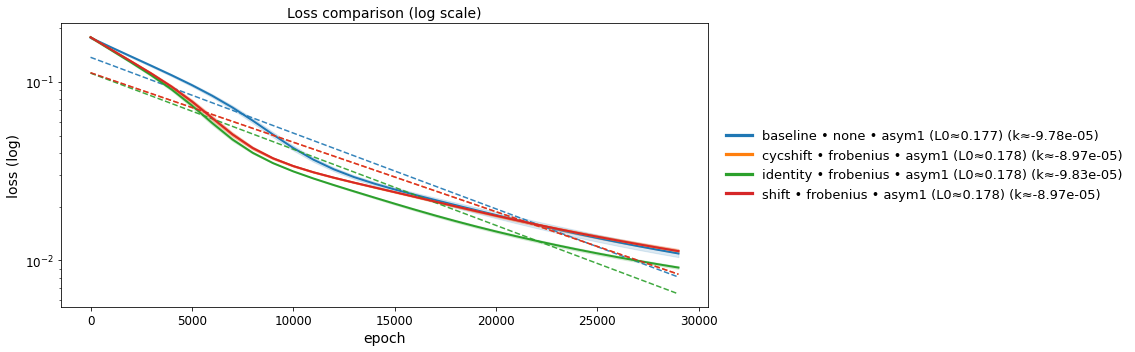

In [32]:
fit_stats = asa.overlay_loss(
    conditions,
    title="Loss comparison",
    fontsize=14,
    figsize=(20, 5),
    fit=True,
    fit_range=None,
    plot_fit=True,
    logy=True,
)
display(fit_stats)

condition  init_epoch  init_loss  slope  intercept  r2  \
0       baseline • none • asym1           0   0.177244    NaN        NaN NaN   
1  cycshift • frobenius • asym1           0   0.178267    NaN        NaN NaN   
2  identity • frobenius • asym1           0   0.178309    NaN        NaN NaN   
3     shift • frobenius • asym1           0   0.178268    NaN        NaN NaN   

   half_life_epochs  fit_emin  fit_emax  
0               NaN         0     29000  
1               NaN         0     29000  
2               NaN         0     29000  
3               NaN         0     29000

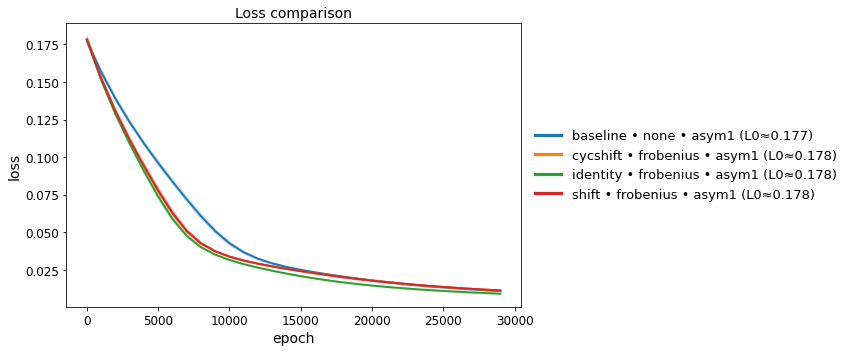

In [33]:
asa.overlay_loss(
    conditions,
    title="Loss comparison",
    fontsize=14,
    figsize=(15, 5),
    fit=False,
    fit_range=None,
    plot_fit=False,
    logy=False,
)

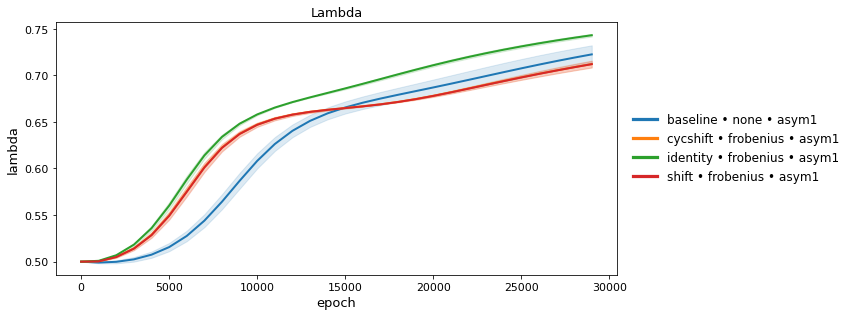

In [34]:
fit_spec = asa.overlay_metric(
    conditions,
    key="lambda",
    title="Lambda",
    fontsize=13,
    figsize=(15, 4.5),
    logy=False,
    fit=False,
    fit_on_log=False,  # ln(metric) fit
    fit_range=None,
    plot_fit=False,
)

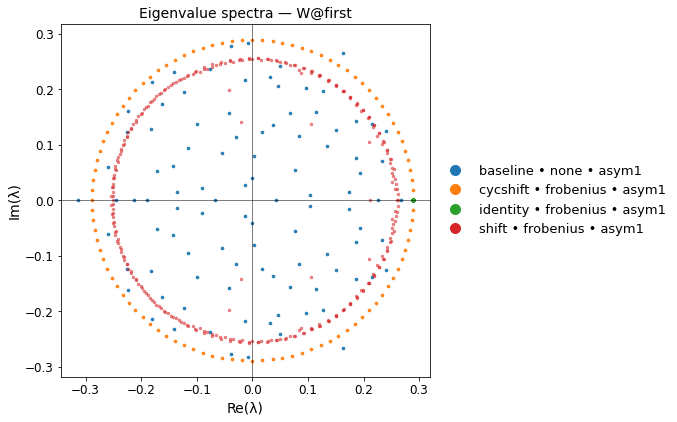

In [35]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_eigs_snapshots(
    condition_roots,
    snapshot="first",  # or "first" / "middle"
    matrix="W",  # choose "W", "S", or "A"
    title="Eigenvalue spectra",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
)

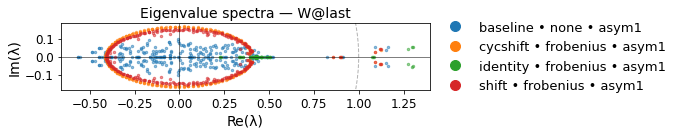

In [36]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_eigs_snapshots(
    condition_roots,
    snapshot="last",  # or "first" / "middle"
    matrix="W",  # choose "W", "S", or "A"
    title="Eigenvalue spectra",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
)

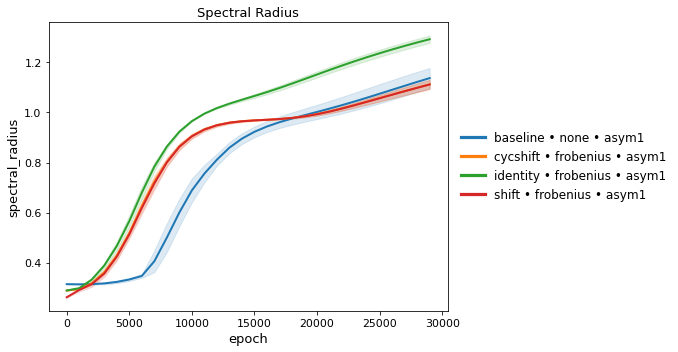

In [37]:
fit_spec = asa.overlay_metric(
    conditions,
    key="spectral_radius",
    title="Spectral Radius",
    fontsize=13,
    figsize=(12, 5),
    logy=False,
    fit=False,
    fit_on_log=False,  # ln(metric) fit
    fit_range=None,
    plot_fit=False,
)

condition  slope  intercept  r2  half_life_epochs  \
0       baseline • none • asym1    NaN        NaN NaN               NaN   
1  cycshift • frobenius • asym1    NaN        NaN NaN               NaN   
2  identity • frobenius • asym1    NaN        NaN NaN               NaN   
3     shift • frobenius • asym1    NaN        NaN NaN               NaN   

   fit_emin  fit_emax  
0         0     29000  
1         0     29000  
2         0     29000  
3         0     29000

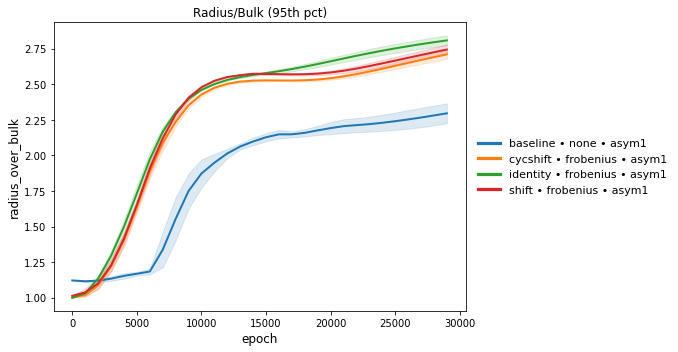

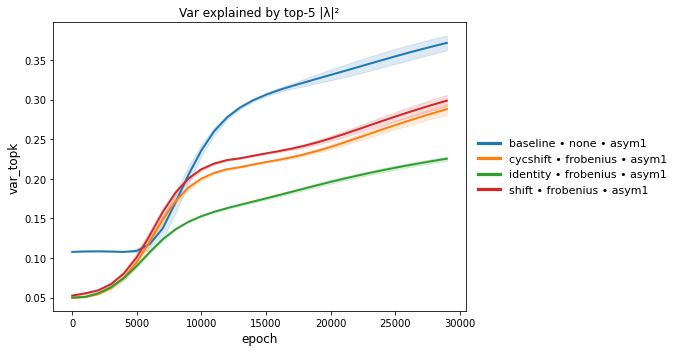

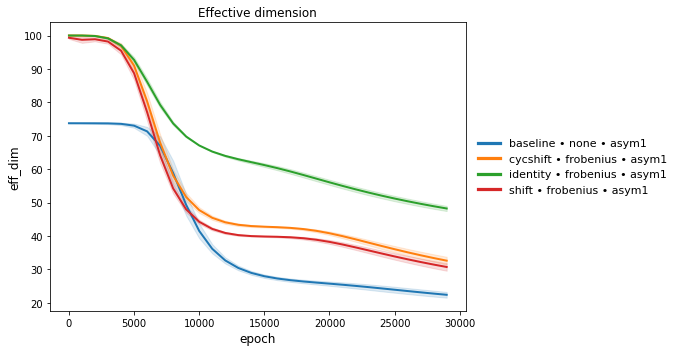

In [38]:
asa.overlay_metric(
    conditions, key="radius_over_bulk", title="Radius/Bulk (95th pct)", figsize=(12, 5)
)
asa.overlay_metric(
    conditions, key="var_topk", title="Var explained by top-5 |λ|²", figsize=(12, 5)
)
asa.overlay_metric(
    conditions, key="eff_dim", title="Effective dimension", figsize=(12, 5)
)

../AnalyzeSymAsym.py:718: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(rect=(0.0, 0.0, 0.8, 1.0))


condition  slope  intercept  r2  half_life_epochs  \
0       baseline • none • asym1    NaN        NaN NaN               NaN   
1  cycshift • frobenius • asym1    NaN        NaN NaN               NaN   
2  identity • frobenius • asym1    NaN        NaN NaN               NaN   
3     shift • frobenius • asym1    NaN        NaN NaN               NaN   

   fit_emin  fit_emax  
0         0     29000  
1         0     29000  
2         0     29000  
3         0     29000

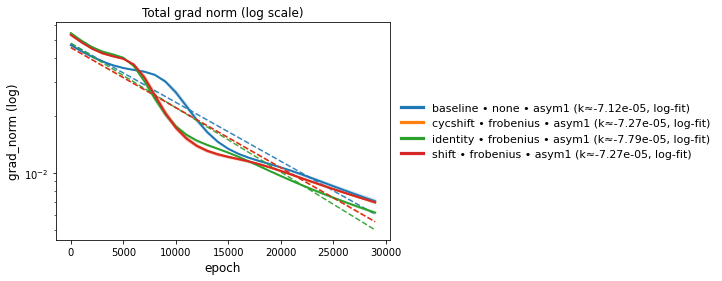

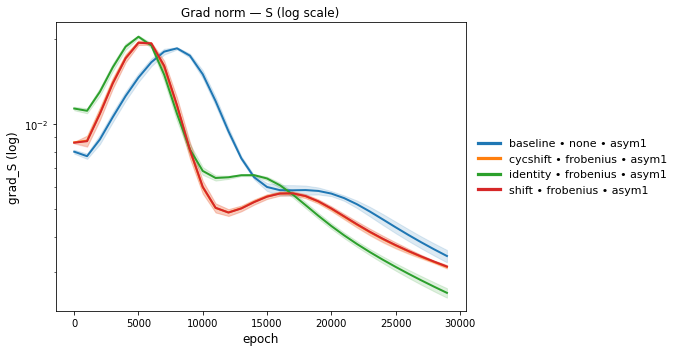

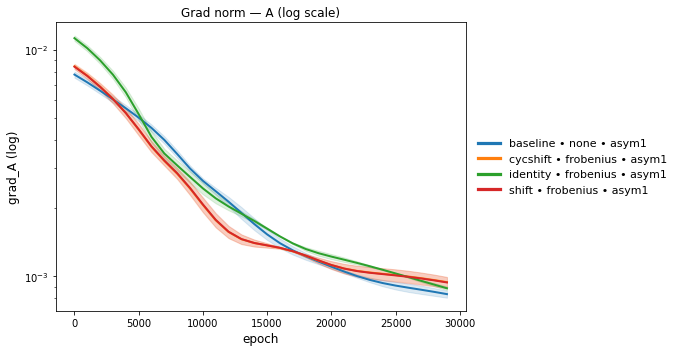

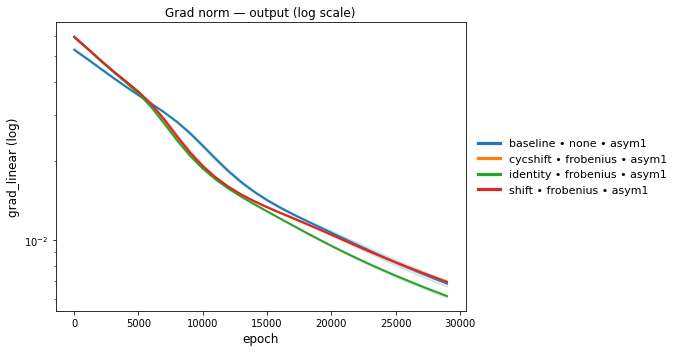

In [39]:
# total grad norm
asa.overlay_metric(
    conditions, key="grad_norm", title="Total grad norm", logy=True, fit=True
)

# per-group grad norms
asa.overlay_metric(
    conditions, key="grad_S", title="Grad norm — S", logy=True, figsize=(12, 5)
)
asa.overlay_metric(
    conditions, key="grad_A", title="Grad norm — A", logy=True, figsize=(12, 5)
)
asa.overlay_metric(
    conditions,
    key="grad_linear",
    title="Grad norm — output",
    logy=True,
    figsize=(12, 5),
)

condition  slope  intercept  r2  half_life_epochs  \
0       baseline • none • asym1    NaN        NaN NaN               NaN   
1  cycshift • frobenius • asym1    NaN        NaN NaN               NaN   
2  identity • frobenius • asym1    NaN        NaN NaN               NaN   
3     shift • frobenius • asym1    NaN        NaN NaN               NaN   

   fit_emin  fit_emax  
0         0     29000  
1         0     29000  
2         0     29000  
3         0     29000

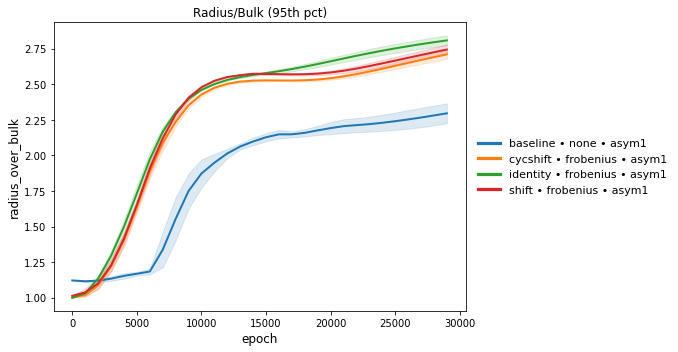

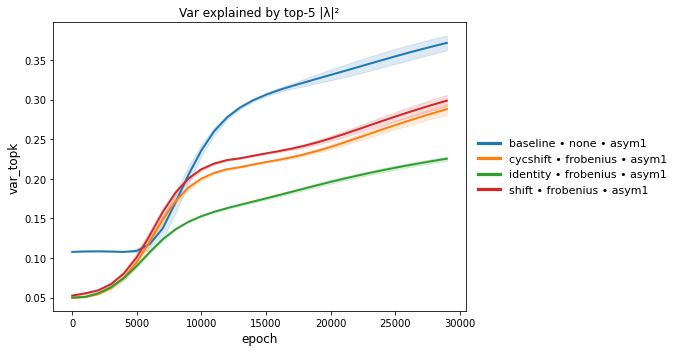

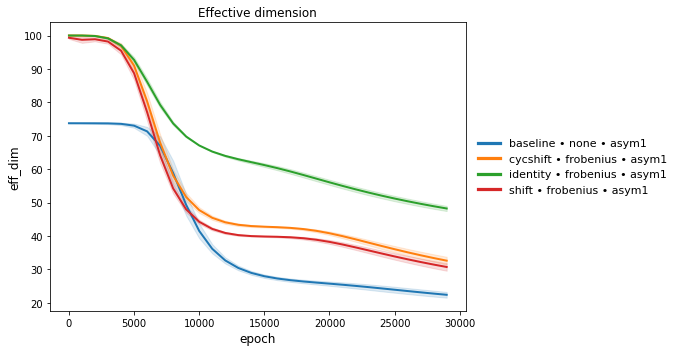

In [40]:
asa.overlay_metric(
    conditions, key="radius_over_bulk", title="Radius/Bulk (95th pct)", figsize=(12, 5)
)
asa.overlay_metric(
    conditions, key="var_topk", title="Var explained by top-5 |λ|²", figsize=(12, 5)
)
asa.overlay_metric(
    conditions, key="eff_dim", title="Effective dimension", figsize=(12, 5)
)

# Same init, different variant -- MH

In [41]:
BASE = Path("../SymAsymRNN") / "N100T100" / "lambda0p50"

# Pick the conditions you want to compare
conditions = {
    "baseline • none • asym1": pd.read_csv(
        BASE / "baseline/none/asym1/analysis/timeseries_metrics.csv"
    ),
    "centcycmh • frobenius • asym1": pd.read_csv(
        BASE / "centcycmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    "centmh • frobenius • asym1": pd.read_csv(
        BASE / "centmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    "shiftcycmh • frobenius • asym1": pd.read_csv(
        BASE / "shiftcycmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    "shiftmh • frobenius • asym1": pd.read_csv(
        BASE / "shiftmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
}

condition_roots = {
    "baseline • none • asym1": BASE / "baseline/none/asym1/multiruns",
    "centcycmh • frobenius • asym1": BASE / "centcycmh/frobenius/asym1/multiruns",
    "centmh • frobenius • asym1": BASE / "centmh/frobenius/asym1/multiruns",
    "shiftcycmh • frobenius • asym1": BASE / "shiftcycmh/frobenius/asym1/multiruns",
    "shiftmh • frobenius • asym1": BASE / "shiftmh/frobenius/asym1/multiruns",
}

condition  init_epoch  init_loss     slope  intercept  \
0         baseline • none • asym1           0   0.177244 -0.000098  -1.983578   
1   centcycmh • frobenius • asym1           0   0.181841 -0.000095  -2.414048   
2      centmh • frobenius • asym1           0   0.181021 -0.000090  -2.428907   
3  shiftcycmh • frobenius • asym1           0   0.179455 -0.000090  -2.036713   
4     shiftmh • frobenius • asym1           0   0.176377 -0.000091  -1.951360   

         r2  half_life_epochs  fit_emin  fit_emax  
0  0.955870       7085.771163         0     29000  
1  0.904574       7272.518848         0     29000  
2  0.911396       7679.816185         0     29000  
3  0.928993       7718.569202         0     29000  
4  0.957138       7585.032921         0     29000

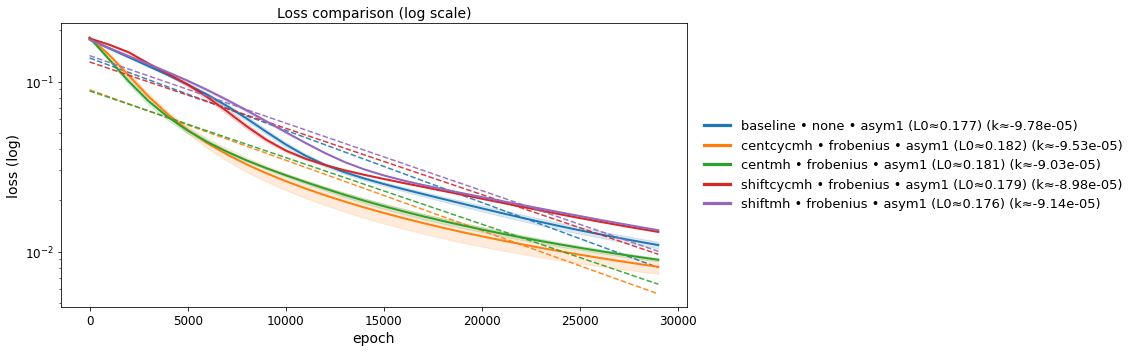

In [42]:
fit_stats = asa.overlay_loss(
    conditions,
    title="Loss comparison",
    fontsize=14,
    figsize=(20, 5),
    fit=True,
    fit_range=None,
    plot_fit=True,
    logy=True,
)
display(fit_stats)

condition  init_epoch  init_loss  slope  intercept  \
0         baseline • none • asym1           0   0.177244    NaN        NaN   
1   centcycmh • frobenius • asym1           0   0.181841    NaN        NaN   
2      centmh • frobenius • asym1           0   0.181021    NaN        NaN   
3  shiftcycmh • frobenius • asym1           0   0.179455    NaN        NaN   
4     shiftmh • frobenius • asym1           0   0.176377    NaN        NaN   

   r2  half_life_epochs  fit_emin  fit_emax  
0 NaN               NaN         0     29000  
1 NaN               NaN         0     29000  
2 NaN               NaN         0     29000  
3 NaN               NaN         0     29000  
4 NaN               NaN         0     29000

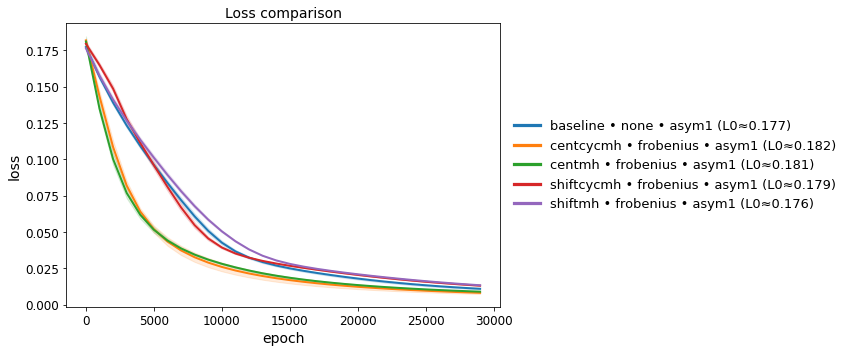

In [43]:
asa.overlay_loss(
    conditions,
    title="Loss comparison",
    fontsize=14,
    figsize=(15, 5),
    fit=False,
    fit_range=None,
    plot_fit=False,
    logy=False,
)

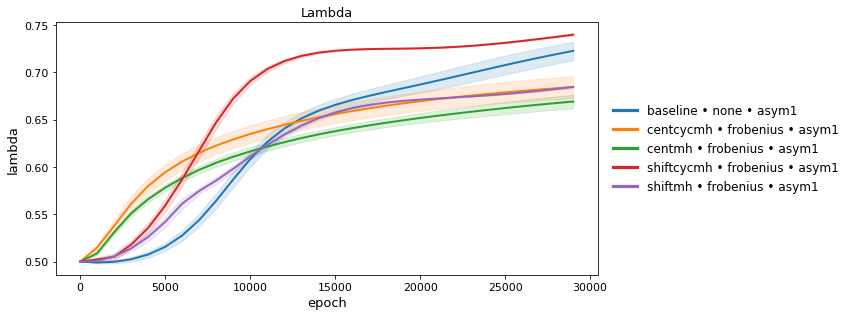

In [44]:
fit_spec = asa.overlay_metric(
    conditions,
    key="lambda",
    title="Lambda",
    fontsize=13,
    figsize=(15, 4.5),
    logy=False,
    fit=False,
    fit_on_log=False,  # ln(metric) fit
    fit_range=None,
    plot_fit=False,
)

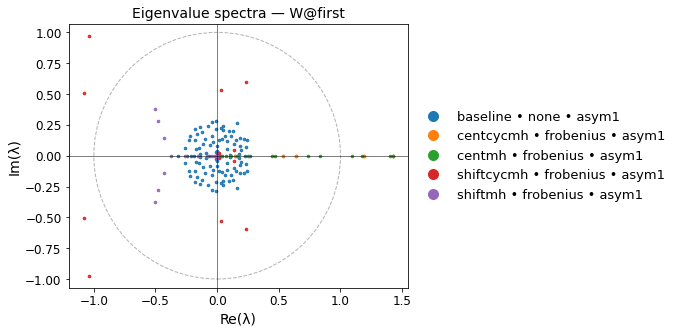

In [45]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_eigs_snapshots(
    condition_roots,
    snapshot="first",  # or "first" / "middle"
    matrix="W",  # choose "W", "S", or "A"
    title="Eigenvalue spectra",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
)

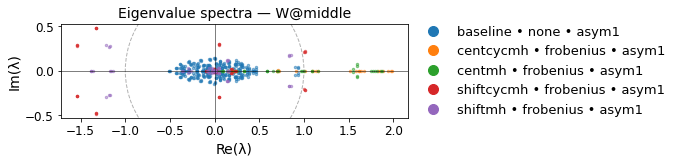

In [46]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_eigs_snapshots(
    condition_roots,
    snapshot="middle",  # or "first" / "middle"
    matrix="W",  # choose "W", "S", or "A"
    title="Eigenvalue spectra",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
)

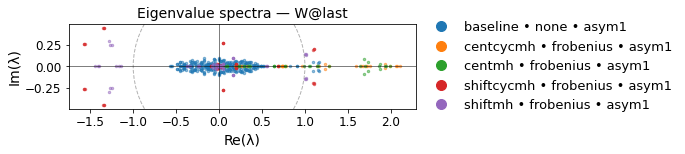

In [47]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_eigs_snapshots(
    condition_roots,
    snapshot="last",  # or "first" / "middle"
    matrix="W",  # choose "W", "S", or "A"
    title="Eigenvalue spectra",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
)

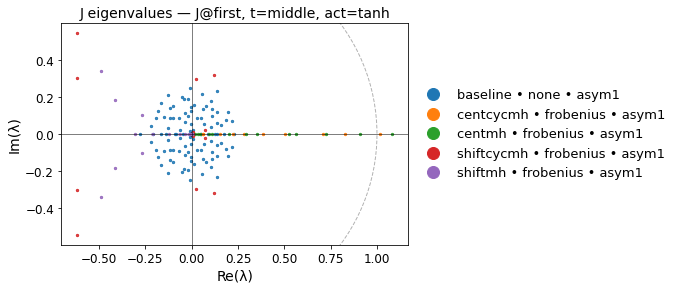

In [48]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_jacobian_eigs_snapshots(
    condition_roots,
    snapshot="first",  # first|middle|last epoch
    tstep="middle",  # first|middle|last time-step
    act="tanh",  # match your RNN hidden nonlinearity
    title="J eigenvalues",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
    unit_circle=True,
    s=5.0,
    alpha=0.45,
    legend_marker_size=12,
)

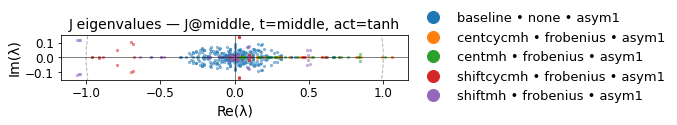

In [49]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_jacobian_eigs_snapshots(
    condition_roots,
    snapshot="middle",  # first|middle|last epoch
    tstep="middle",  # first|middle|last time-step
    act="tanh",  # match your RNN hidden nonlinearity
    title="J eigenvalues",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
    unit_circle=True,
    s=5.0,
    alpha=0.45,
    legend_marker_size=12,
)

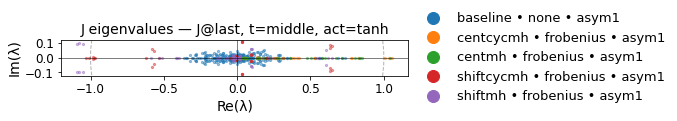

In [50]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_jacobian_eigs_snapshots(
    condition_roots,
    snapshot="last",  # first|middle|last epoch
    tstep="middle",  # first|middle|last time-step
    act="tanh",  # match your RNN hidden nonlinearity
    title="J eigenvalues",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
    unit_circle=True,
    s=5.0,
    alpha=0.45,
    legend_marker_size=12,
)

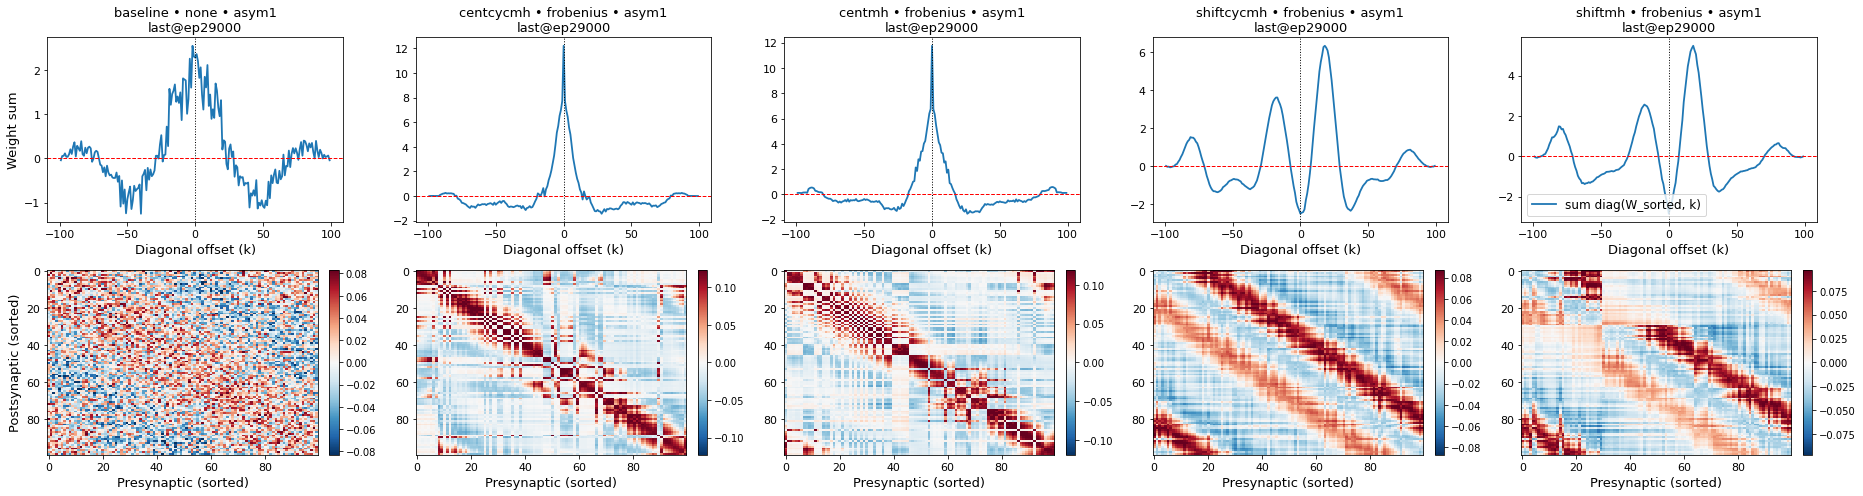

In [51]:
asa.overlay_weight_traces(
    condition_roots,
    snapshot="last",  # or "first" / "middle"
    use_rolling=False,  # True to smooth hidden before argmax
    rolling_window=5,
    fontsize=13,
    figsize_per_cond=(5.2, 3.5),  # width × height per column
    show_heatmap=True,
)

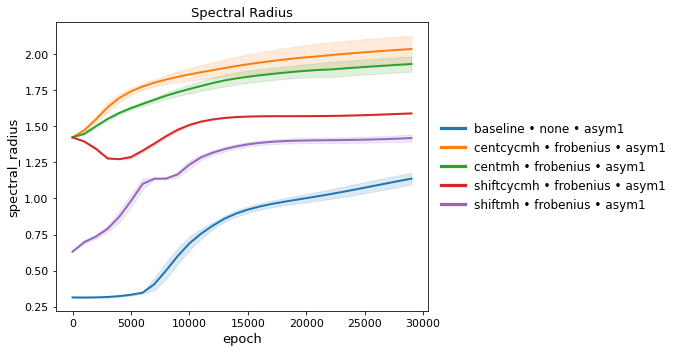

In [52]:
fit_spec = asa.overlay_metric(
    conditions,
    key="spectral_radius",
    title="Spectral Radius",
    fontsize=13,
    figsize=(12, 5),
    logy=False,
    fit=False,
    fit_on_log=False,  # ln(metric) fit
    fit_range=None,
    plot_fit=False,
)

condition  slope  intercept  r2  half_life_epochs  \
0         baseline • none • asym1    NaN        NaN NaN               NaN   
1   centcycmh • frobenius • asym1    NaN        NaN NaN               NaN   
2      centmh • frobenius • asym1    NaN        NaN NaN               NaN   
3  shiftcycmh • frobenius • asym1    NaN        NaN NaN               NaN   
4     shiftmh • frobenius • asym1    NaN        NaN NaN               NaN   

   fit_emin  fit_emax  
0         0     29000  
1         0     29000  
2         0     29000  
3         0     29000  
4         0     29000

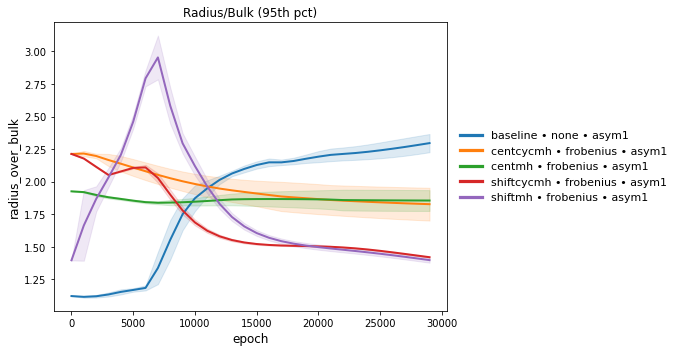

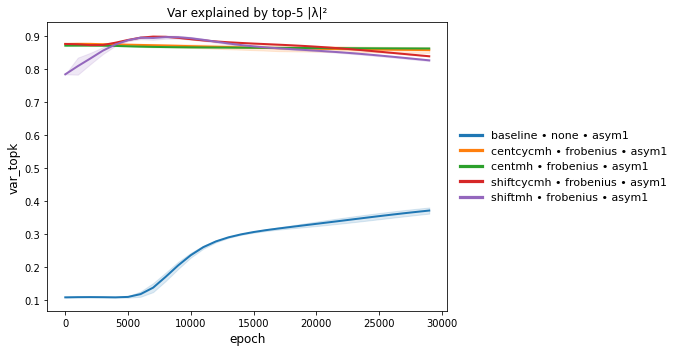

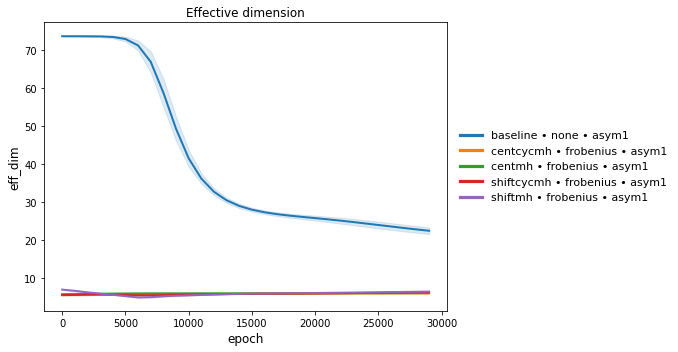

In [53]:
asa.overlay_metric(
    conditions, key="radius_over_bulk", title="Radius/Bulk (95th pct)", figsize=(12, 5)
)
asa.overlay_metric(
    conditions, key="var_topk", title="Var explained by top-5 |λ|²", figsize=(12, 5)
)
asa.overlay_metric(
    conditions, key="eff_dim", title="Effective dimension", figsize=(12, 5)
)

../AnalyzeSymAsym.py:718: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(rect=(0.0, 0.0, 0.8, 1.0))


condition  slope  intercept  r2  half_life_epochs  \
0         baseline • none • asym1    NaN        NaN NaN               NaN   
1   centcycmh • frobenius • asym1    NaN        NaN NaN               NaN   
2      centmh • frobenius • asym1    NaN        NaN NaN               NaN   
3  shiftcycmh • frobenius • asym1    NaN        NaN NaN               NaN   
4     shiftmh • frobenius • asym1    NaN        NaN NaN               NaN   

   fit_emin  fit_emax  
0         0     29000  
1         0     29000  
2         0     29000  
3         0     29000  
4         0     29000

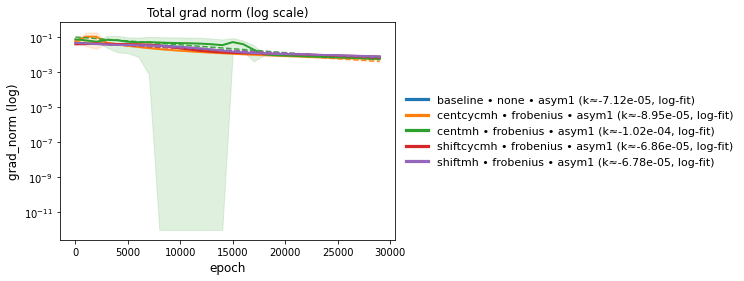

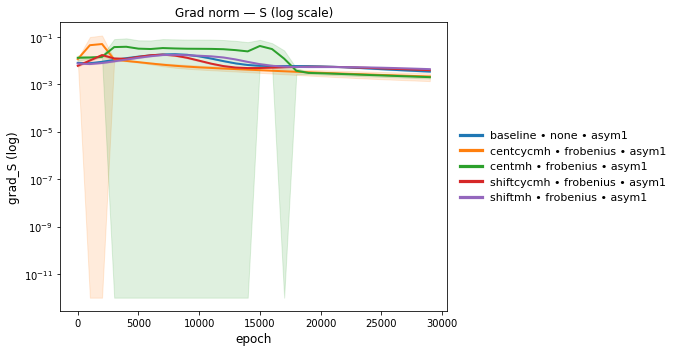

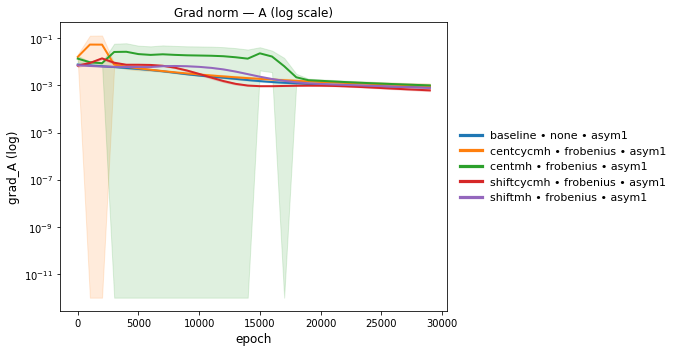

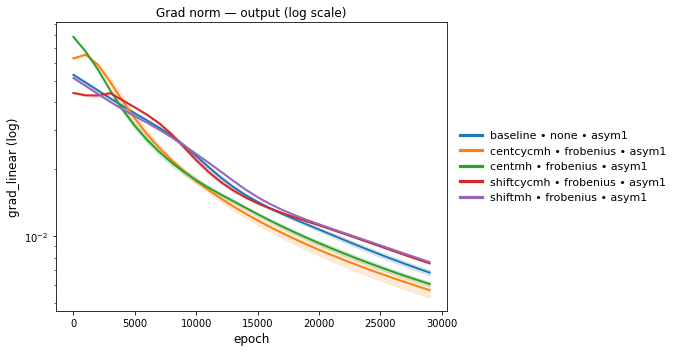

In [54]:
# total grad norm
asa.overlay_metric(
    conditions, key="grad_norm", title="Total grad norm", logy=True, fit=True
)

# per-group grad norms
asa.overlay_metric(
    conditions, key="grad_S", title="Grad norm — S", logy=True, figsize=(12, 5)
)
asa.overlay_metric(
    conditions, key="grad_A", title="Grad norm — A", logy=True, figsize=(12, 5)
)
asa.overlay_metric(
    conditions,
    key="grad_linear",
    title="Grad norm — output",
    logy=True,
    figsize=(12, 5),
)

# Different encodings

In [55]:
BASE = Path("../SymAsymRNN") / "N100T100" / "lambda0p50"

# Pick the conditions you want to compare
conditions = {
    "baseline • none • asym1": pd.read_csv(
        BASE / "baseline/none/asym1/analysis/timeseries_metrics.csv"
    ),
    "baseline • none • sym1": pd.read_csv(
        BASE / "baseline/none/sym1/analysis/timeseries_metrics.csv"
    ),
    "centcycmh • frobenius • asym1": pd.read_csv(
        BASE / "centcycmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    "centcycmh • frobenius • sym1": pd.read_csv(
        BASE / "centcycmh/frobenius/sym1/analysis/timeseries_metrics.csv"
    ),
}

condition_roots = {
    "baseline • none • asym1": BASE / "centcycmh/frobenius/asym1/multiruns",
    "baseline • none • sym1": BASE / "centcycmh/frobenius/sym1/multiruns",
    "centcycmh • frobenius • asym1": BASE / "centcycmh/frobenius/asym1/multiruns",
    "centcycmh • frobenius • sym1": BASE / "centcycmh/frobenius/sym1/multiruns",
}

condition  init_epoch  init_loss     slope  intercept  \
0        baseline • none • asym1           0   0.177244 -0.000098  -1.983578   
1         baseline • none • sym1           0   0.177221 -0.000098  -1.984005   
2  centcycmh • frobenius • asym1           0   0.181841 -0.000095  -2.414048   
3   centcycmh • frobenius • sym1           0   0.181090 -0.000096  -2.437172   

         r2  half_life_epochs  fit_emin  fit_emax  
0  0.955870       7085.771163         0     29000  
1  0.955927       7075.946929         0     29000  
2  0.904574       7272.518848         0     29000  
3  0.897246       7255.034425         0     29000

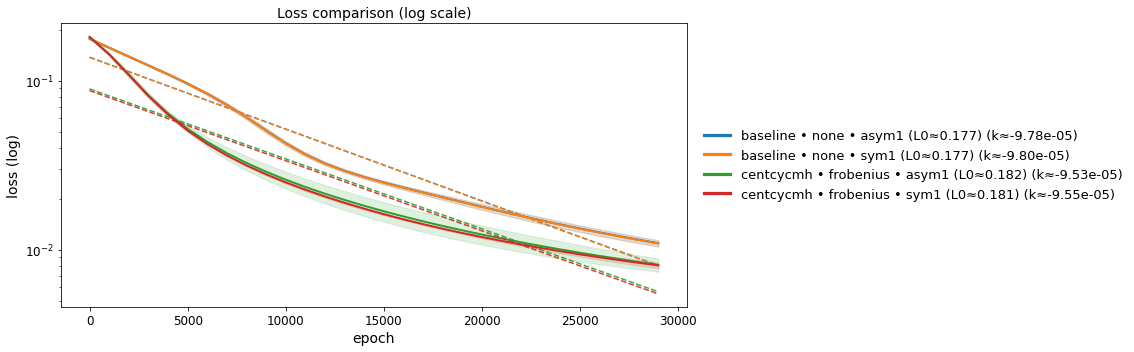

In [56]:
# Now overlay them
fit_stats = asa.overlay_loss(
    conditions,
    title="Loss comparison",
    fontsize=14,
    figsize=(20, 5),
    fit=True,
    fit_range=None,
    plot_fit=True,
    logy=True,
)
display(fit_stats)

condition  init_epoch  init_loss  slope  intercept  r2  \
0        baseline • none • asym1           0   0.177244    NaN        NaN NaN   
1         baseline • none • sym1           0   0.177221    NaN        NaN NaN   
2  centcycmh • frobenius • asym1           0   0.181841    NaN        NaN NaN   
3   centcycmh • frobenius • sym1           0   0.181090    NaN        NaN NaN   

   half_life_epochs  fit_emin  fit_emax  
0               NaN         0     29000  
1               NaN         0     29000  
2               NaN         0     29000  
3               NaN         0     29000

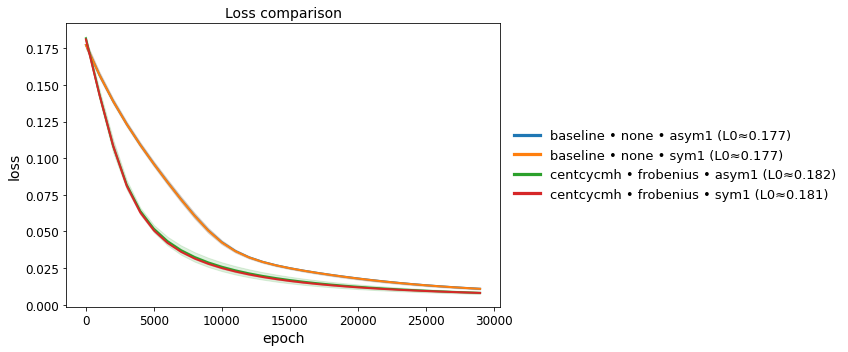

In [57]:
asa.overlay_loss(
    conditions,
    title="Loss comparison",
    fontsize=14,
    figsize=(15, 5),
    fit=False,
    fit_range=None,
    plot_fit=False,
    logy=False,
)

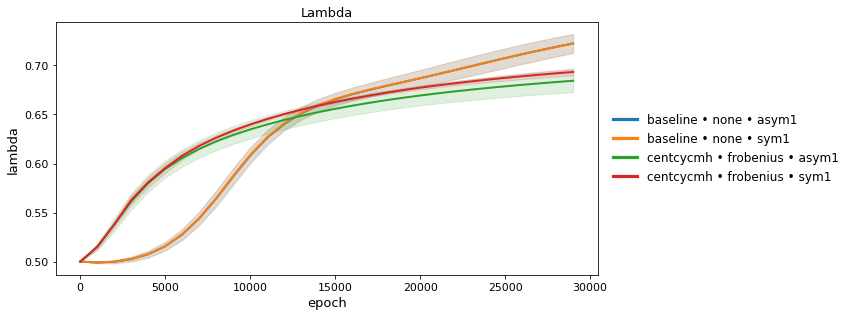

In [58]:
fit_spec = asa.overlay_metric(
    conditions,
    key="lambda",
    title="Lambda",
    fontsize=13,
    figsize=(15, 4.5),
    logy=False,
    fit=False,
    fit_on_log=False,  # ln(metric) fit
    fit_range=None,
    plot_fit=False,
)

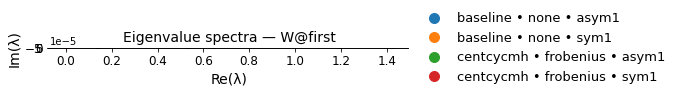

In [59]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_eigs_snapshots(
    condition_roots,
    snapshot="first",  # or "first" / "middle"
    matrix="W",  # choose "W", "S", or "A"
    title="Eigenvalue spectra",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
)

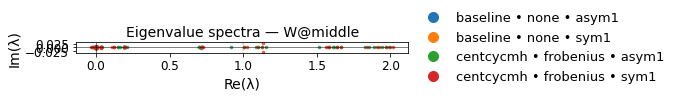

In [60]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_eigs_snapshots(
    condition_roots,
    snapshot="middle",  # or "first" / "middle"
    matrix="W",  # choose "W", "S", or "A"
    title="Eigenvalue spectra",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
)

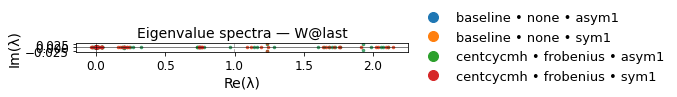

In [61]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_eigs_snapshots(
    condition_roots,
    snapshot="last",  # or "first" / "middle"
    matrix="W",  # choose "W", "S", or "A"
    title="Eigenvalue spectra",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
)

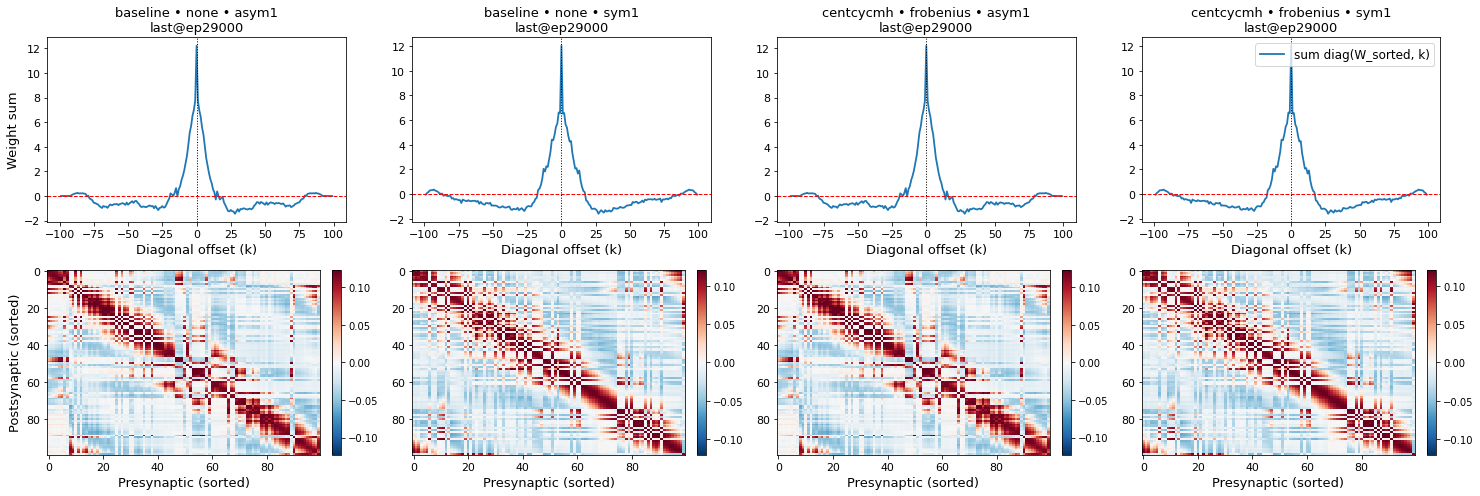

In [62]:
asa.overlay_weight_traces(
    condition_roots,
    snapshot="last",  # or "first" / "middle"
    use_rolling=False,  # True to smooth hidden before argmax
    rolling_window=5,
    fontsize=13,
    figsize_per_cond=(5.2, 3.5),  # width × height per column
    show_heatmap=True,
)

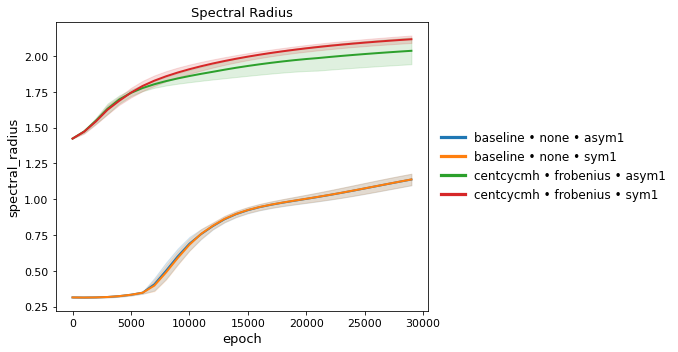

In [63]:
fit_spec = asa.overlay_metric(
    conditions,
    key="spectral_radius",
    title="Spectral Radius",
    fontsize=13,
    figsize=(12, 5),
    logy=False,
    fit=False,
    fit_on_log=False,  # ln(metric) fit
    fit_range=None,
    plot_fit=False,
)

condition  slope  intercept  r2  half_life_epochs  \
0        baseline • none • asym1    NaN        NaN NaN               NaN   
1         baseline • none • sym1    NaN        NaN NaN               NaN   
2  centcycmh • frobenius • asym1    NaN        NaN NaN               NaN   
3   centcycmh • frobenius • sym1    NaN        NaN NaN               NaN   

   fit_emin  fit_emax  
0         0     29000  
1         0     29000  
2         0     29000  
3         0     29000

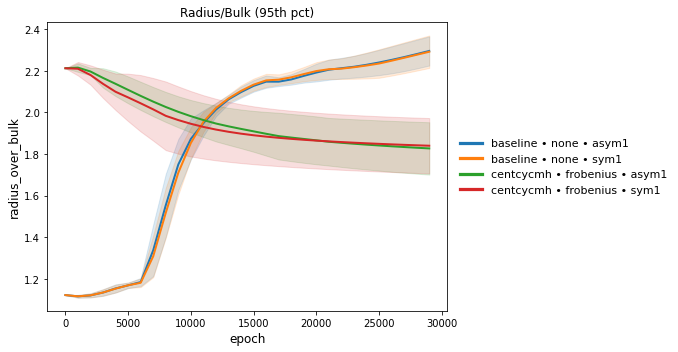

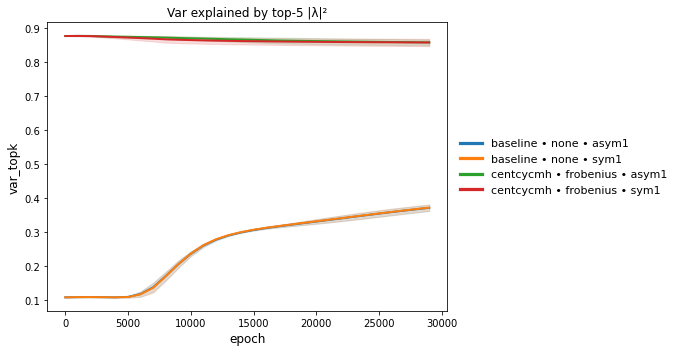

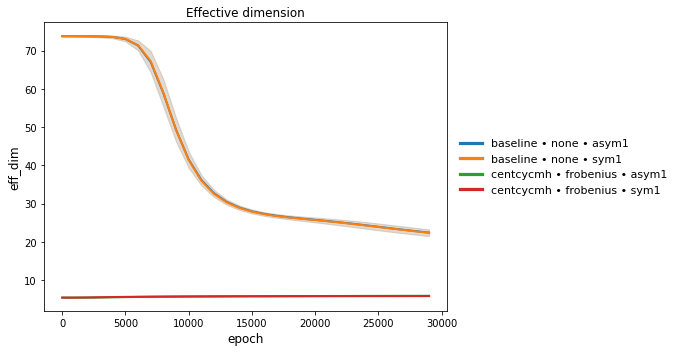

In [64]:
asa.overlay_metric(
    conditions, key="radius_over_bulk", title="Radius/Bulk (95th pct)", figsize=(12, 5)
)
asa.overlay_metric(
    conditions, key="var_topk", title="Var explained by top-5 |λ|²", figsize=(12, 5)
)
asa.overlay_metric(
    conditions, key="eff_dim", title="Effective dimension", figsize=(12, 5)
)

../AnalyzeSymAsym.py:718: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(rect=(0.0, 0.0, 0.8, 1.0))


condition  slope  intercept  r2  half_life_epochs  \
0        baseline • none • asym1    NaN        NaN NaN               NaN   
1         baseline • none • sym1    NaN        NaN NaN               NaN   
2  centcycmh • frobenius • asym1    NaN        NaN NaN               NaN   
3   centcycmh • frobenius • sym1    NaN        NaN NaN               NaN   

   fit_emin  fit_emax  
0         0     29000  
1         0     29000  
2         0     29000  
3         0     29000

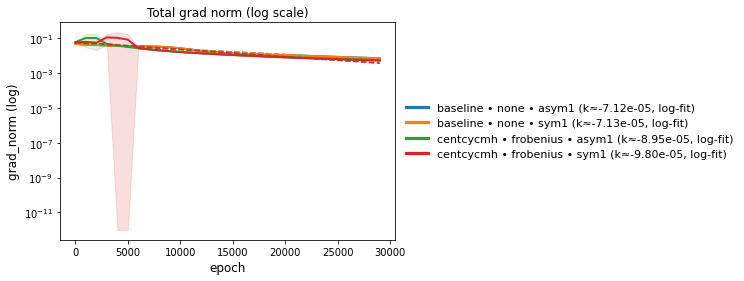

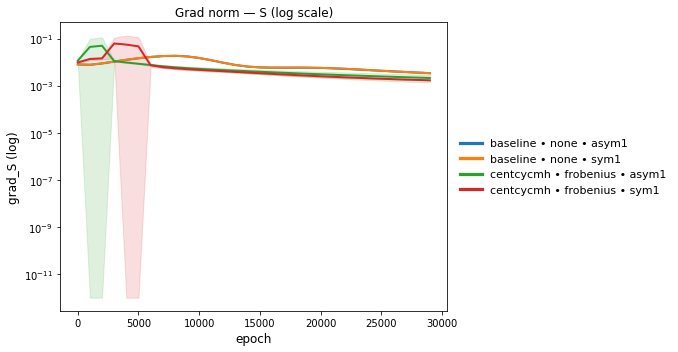

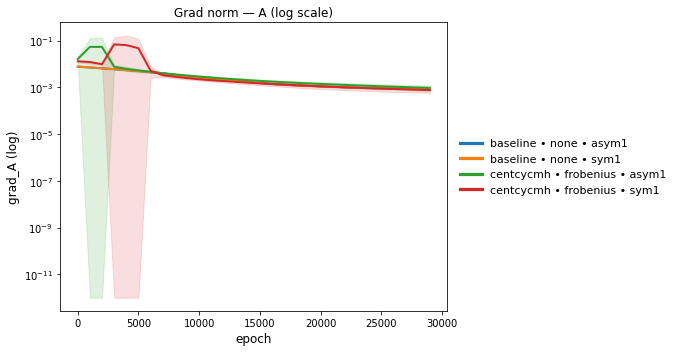

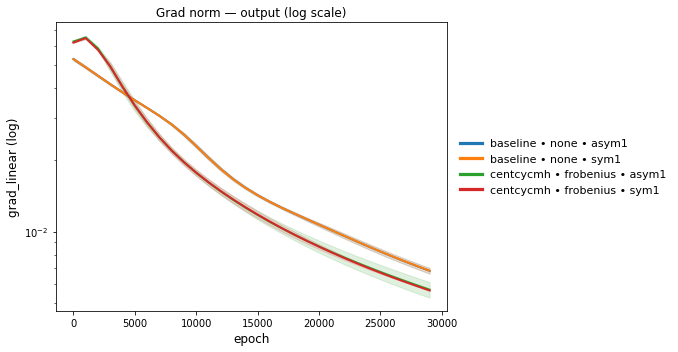

In [65]:
# total grad norm
asa.overlay_metric(
    conditions, key="grad_norm", title="Total grad norm", logy=True, fit=True
)

# per-group grad norms
asa.overlay_metric(
    conditions, key="grad_S", title="Grad norm — S", logy=True, figsize=(12, 5)
)
asa.overlay_metric(
    conditions, key="grad_A", title="Grad norm — A", logy=True, figsize=(12, 5)
)
asa.overlay_metric(
    conditions,
    key="grad_linear",
    title="Grad norm — output",
    logy=True,
    figsize=(12, 5),
)